**Import Libraries**

In [ ]:
# Import necessary libraries

# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Data preprocessing
from sklearn.utils import resample                      # Sampling methods
from imblearn.over_sampling import SMOTE                # Over sampling
from imblearn.over_sampling import ADASYN               # Over sampling
from sklearn.model_selection import train_test_split    # Splitting datasets

# Feature engineering
import datetime as dt
from sklearn.preprocessing import StandardScaler    # Feature scaling
!pip install category_encoders                      # Install the category_encoders library
from category_encoders import WOEEncoder            # Import the WOEEncoder class from the category_encoders library
from sklearn.preprocessing import LabelEncoder

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score

# Style and color palette for seaborn plots
sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

# Manage warning messages
import warnings
warnings.simplefilter("ignore")     # Ignore all warnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 956.1 kB/s eta 0:00:00


**Load Data**

In [ ]:
# Install kaggle

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

**Dataset 1**

In [ ]:
# Download datasets from Kaggle

! kaggle datasets download kartik2112/fraud-detection/

 94% 190M/202M [00:01<00:00, 123MB/s]
100% 202M/202M [00:01<00:00, 139MB/s]


In [ ]:
# Unzip dataset zip file

! unzip fraud-detection.zip

Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [ ]:
# Load the datasets

# Dataset 1
train_df1 = pd.read_csv('/content/fraudTrain.csv', index_col='Unnamed: 0')
test_df1 = pd.read_csv('/content/fraudTest.csv', index_col='Unnamed: 0')

**Exploratory Data Analysis**

In [ ]:
# Display the first few rows of the train dataset

train_df1.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [ ]:
# Display the first few rows of the test dataset

test_df1.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [ ]:
# Display basic information about the datasets

# Dataset 1
print("Train Data Info for Dataset 1:")
print(train_df1.info())
print("\nTest Data Info for Dataset 1:")
print(test_df1.info())

Train Data Info for Dataset 1:
<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float

**There are a lot of categorical features. So we will encode them later.**

In [ ]:
# Dataset 1
print("Shape of Train and Test Dataset 1\n")
print(train_df1.shape)
print(test_df1.shape)

Shape of Train and Test Dataset 1

(1296675, 22)
(555719, 22)


In [ ]:
# Check for missing values and duplicate values in dataset

# Dataset 1
print("Missing values and duplicate values in Train and Test dataset 1\n")
print(train_df1.isna().sum().sum())
print(train_df1.duplicated().sum())

Missing values and duplicate values in Train and Test dataset 1

0
0


**Null values and duplicate values are not found.**

In [ ]:
# Display summary statistics of the train dataset

# Dataset 1
print("\nTrain Data 1 Summary Statistics:\n")
print(train_df1.describe())
print("\nTest Data 1 Summary Statistics:\n")
print(train_df1.describe())


Train Data 1 Summary Statistics:

             cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05

In [ ]:
# Number of fraud and legitimate transactions

# Dataset 1
print("Train Dataset 1")
is_fraud = train_df1["is_fraud"].value_counts()
print("Fraud: ",is_fraud[1])
print("Legitimate: ",is_fraud[0])

Train Dataset 1
Fraud:  7506
Legitimate:  1289169


Train Dataset 1



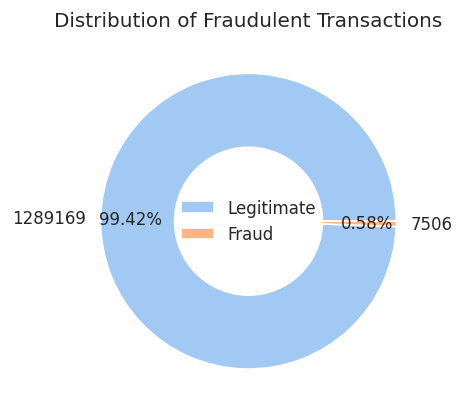

In [ ]:
# Visualize the distribution of the target variable (fraudulent or not)

# Dataset 1
print("Train Dataset 1\n")
donut = train_df1["is_fraud"].value_counts().reset_index()

labels = ["Legitimate", "Fraud"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["count"],
        labels=donut["count"],
        autopct="%1.2f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Fraudulent Transactions")
plt.legend(labels, loc="center", frameon=False)
plt.show();

**The dataset is highly imbalanced.**


**99.4% is not fraud and only 0.6% is fraud leads to imbalanced data**

In [ ]:
# Select only numeric columns
numeric_columns = train_df1.select_dtypes(include='number')

numeric_columns.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721
is_fraud,-0.000981,0.219404,-0.002162,0.001894,0.001721,0.002136,-0.005078,0.001741,0.001721,1.000000


<Axes: >

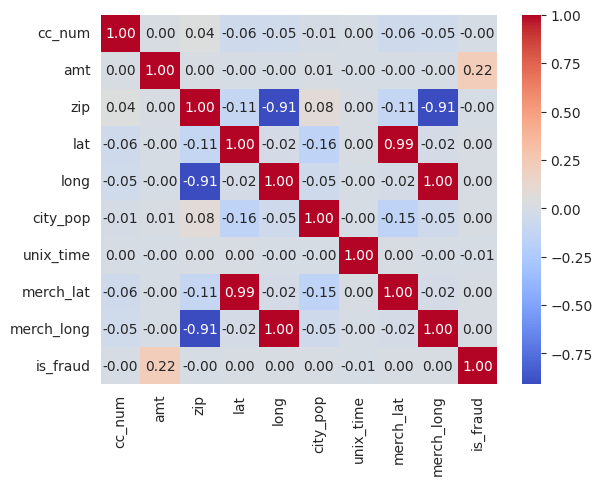

In [ ]:
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm', fmt=".2f")

Train Dataset 1



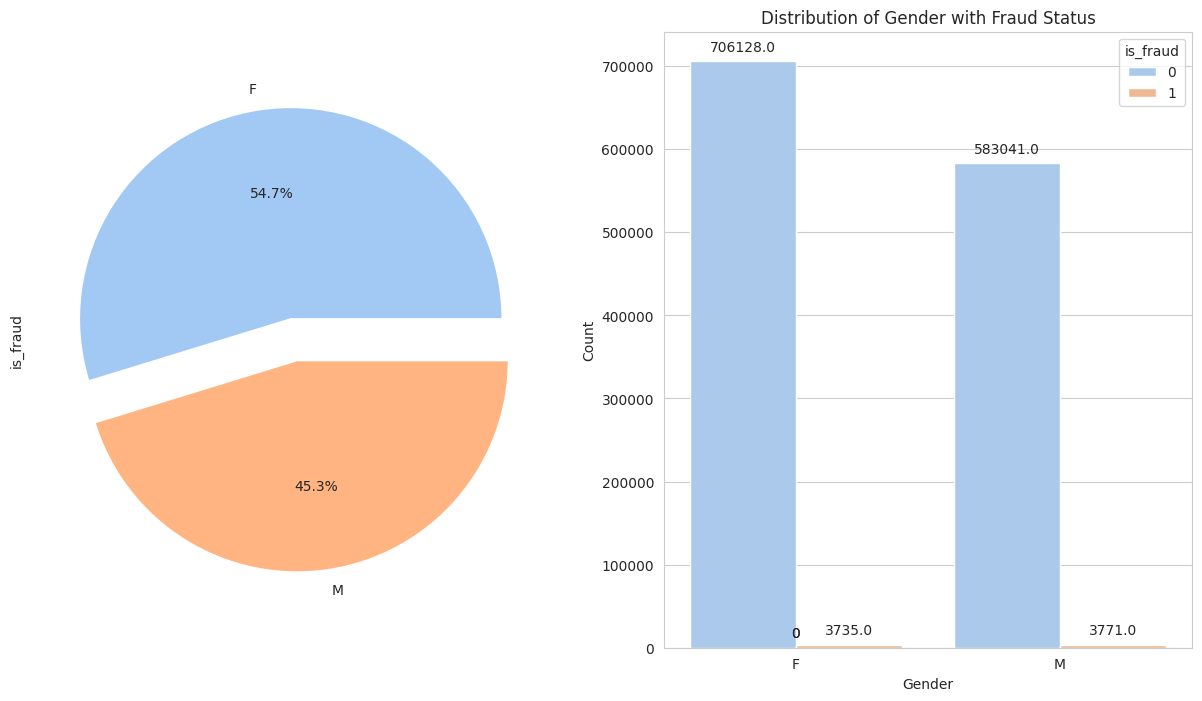

In [ ]:
# Dataset 1

print("Train Dataset 1\n")
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
train_df1.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=train_df1,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

**As per dataset 1, females are doing more transactions but males are more likely to make fraud transaction.**

**Let's check the distribution of the amount ("amt") feature.**

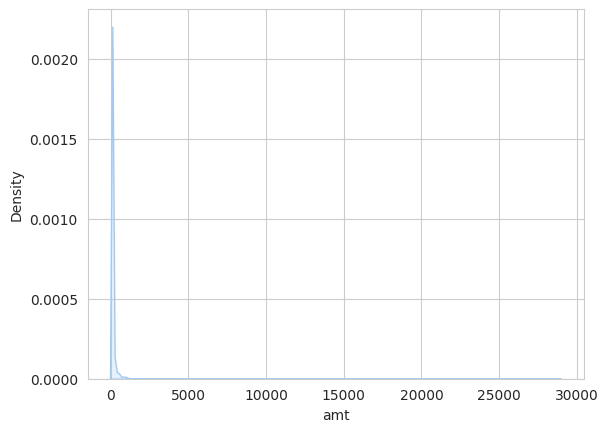

In [ ]:
sns.kdeplot(train_df1["amt"], fill=True);

**Higher values of amount is distorting the graph. So we fix it plotting only 0-99% of amount.**

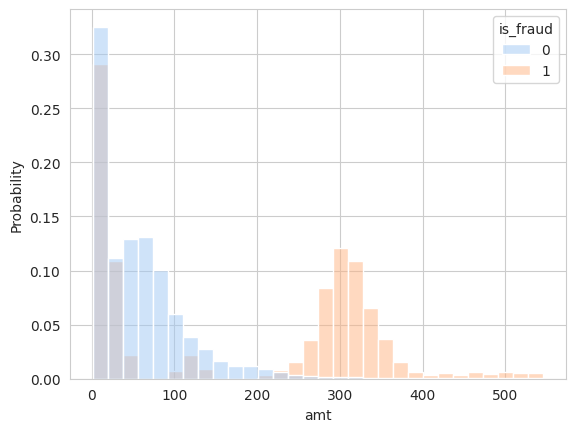

In [ ]:
pct99 = train_df1["amt"].quantile(0.99)
sns.histplot(x="amt", hue="is_fraud", bins=30,
             stat="probability", data=train_df1[train_df1["amt"] <= pct99],
             common_norm=False);

Fraud Amount Statistics:
count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

Non-Fraud Amount Statistics:
count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64


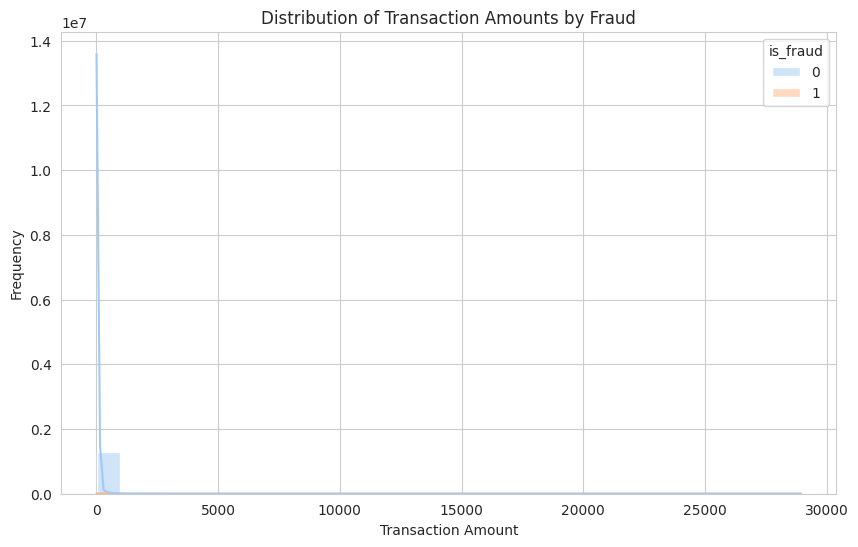

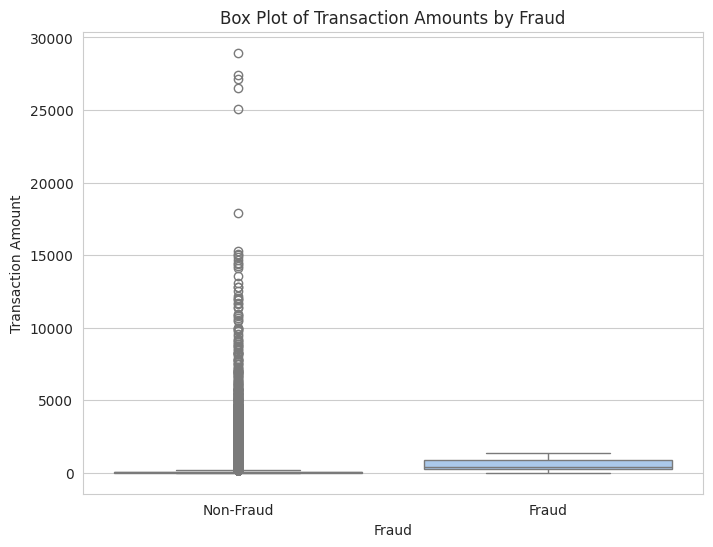

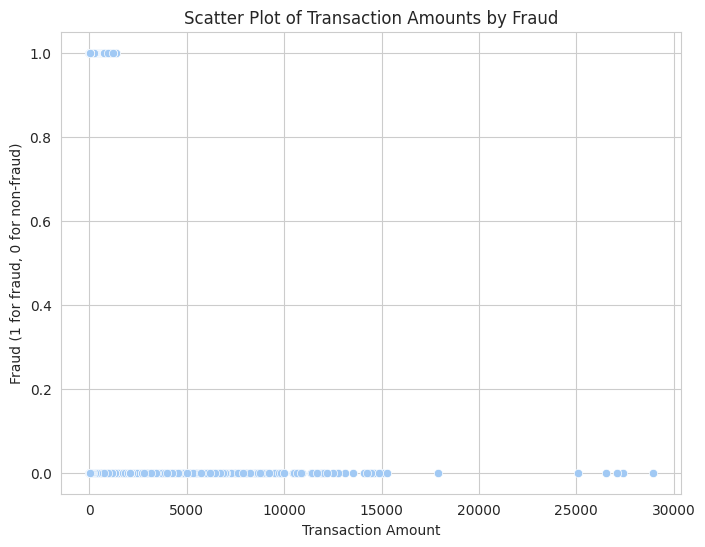

T-statistic: 102.80470607258108
P-value: 0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
fraud_amount_stats = train_df1[train_df1['is_fraud'] == 1]['amt'].describe()
non_fraud_amount_stats = train_df1[train_df1['is_fraud'] == 0]['amt'].describe()

print("Fraud Amount Statistics:")
print(fraud_amount_stats)
print("\nNon-Fraud Amount Statistics:")
print(non_fraud_amount_stats)

# Distribution visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df1, x='amt', hue='is_fraud', kde=True, bins=30)
plt.title('Distribution of Transaction Amounts by Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df1, x='is_fraud', y='amt')
plt.title('Box Plot of Transaction Amounts by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df1, x='amt', y='is_fraud')
plt.title('Scatter Plot of Transaction Amounts by Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Fraud (1 for fraud, 0 for non-fraud)')
plt.show()

# Statistical test (t-test)
from scipy.stats import ttest_ind

fraud_amounts = train_df1[train_df1['is_fraud'] == 1]['amt']
non_fraud_amounts = train_df1[train_df1['is_fraud'] == 0]['amt']

t_stat, p_value = ttest_ind(fraud_amounts, non_fraud_amounts, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

**We can expand this analysis to each transaction category:**

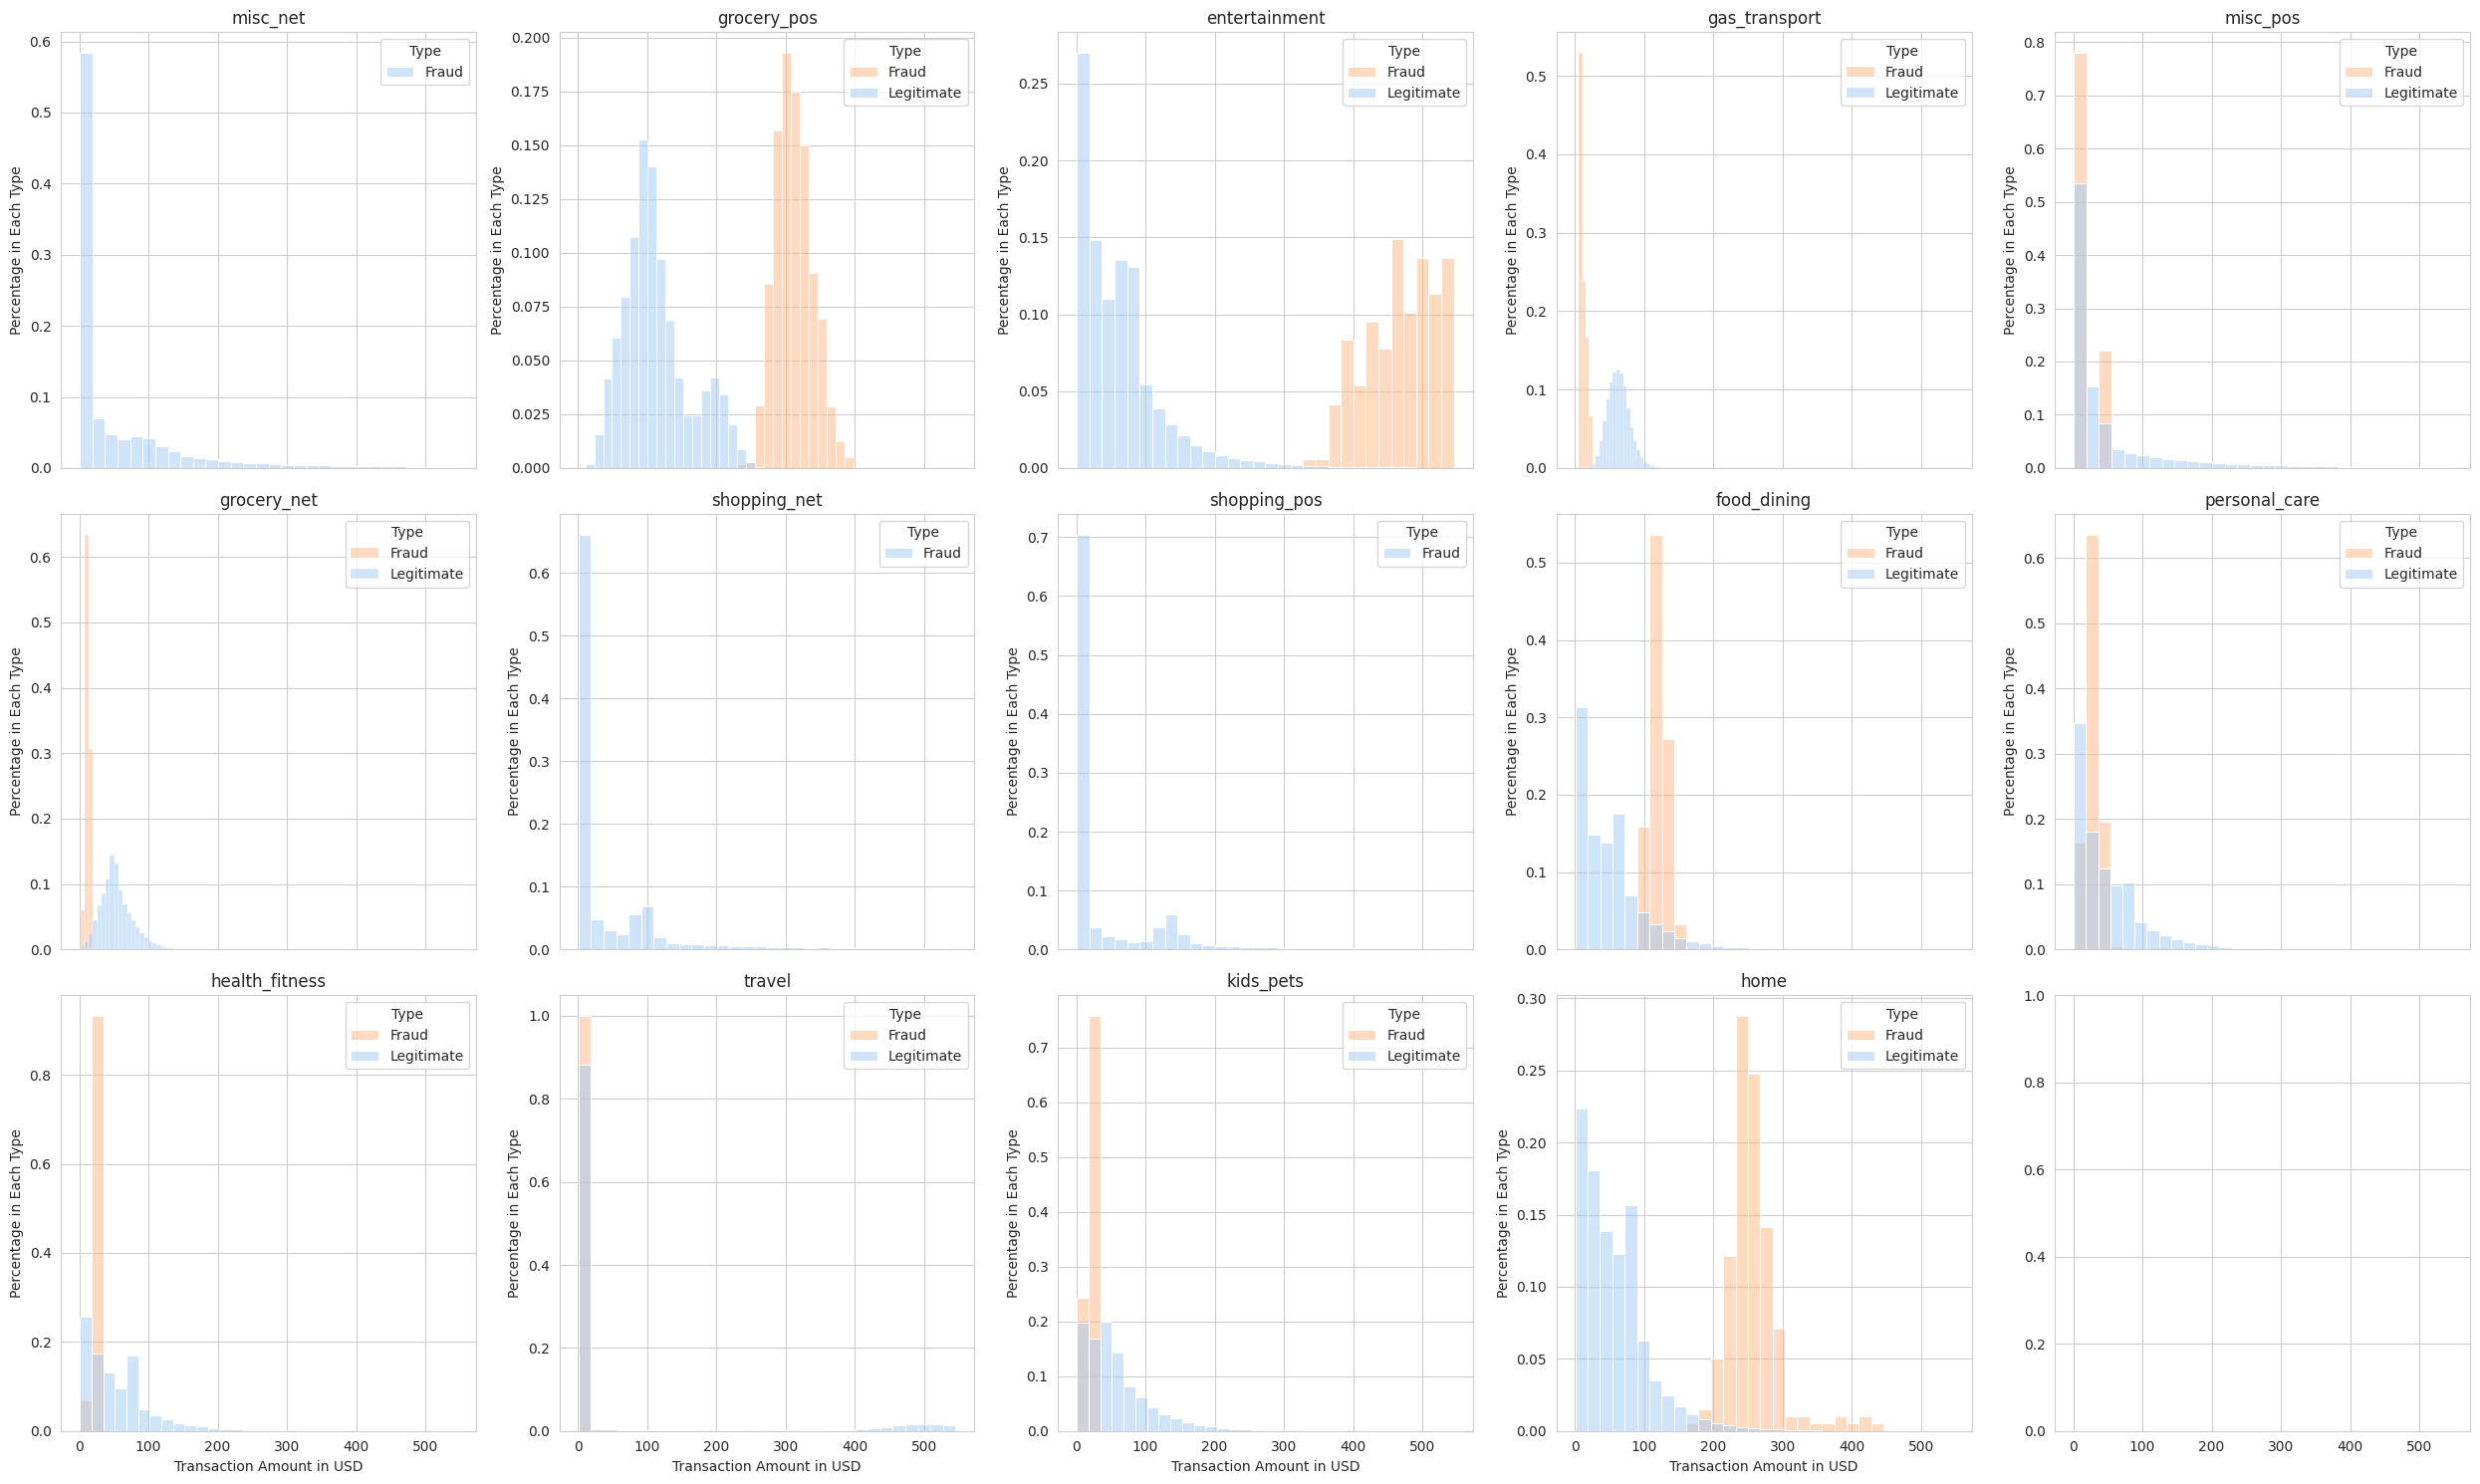

In [ ]:
categories = train_df1['category'].unique()

num_plots = len(categories)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)

for ax, category in zip(axes.ravel(),categories):

    data_category = train_df1[train_df1['category'] == category]

    sns.histplot(x='amt', data=data_category[data_category['amt'] <= pct99],
                 hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{category}')
    ax.legend(title='Type', labels=['Fraud', 'Legitimate'])

plt.tight_layout()
plt.show();

Lets dive into categories. We'll analyze which categories the frauds are more frequently. For this, we'll calculate the distribution for each category for normal transactions and then the distribution for fraudulents transactions. Then, we take the difference between the two distributions. This difference shows us the categories that are most predominants to have frauds.

In [ ]:
# non_fraud
non_fraud = train_df1[train_df1['is_fraud'] == 0]['category'].value_counts(
    normalize=True).to_frame().reset_index()
non_fraud.columns = ['category', 'not_fraud_percentual_vs_total']

# fraud
fraud = train_df1[train_df1['is_fraud'] == 1]['category'].value_counts(
    normalize=True).to_frame().reset_index()
fraud.columns = ['category', 'fraud_percentage_vs_total']

# merging two dataframes and calculating "fraud level"
non_fraud_vs_fraud = non_fraud.merge(fraud, on='category')
non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_percentage_vs_total'] - \
    non_fraud_vs_fraud['not_fraud_percentual_vs_total']

non_fraud_vs_fraud

,category,not_fraud_percentual_vs_total,fraud_percentage_vs_total,fraud_level
0,gas_transport,0.101648,0.082334,-0.019314
1,home,0.095346,0.026379,-0.068967
2,grocery_pos,0.094553,0.232214,0.137661
3,shopping_pos,0.089848,0.112310,0.022462
4,kids_pets,0.087495,0.031841,-0.055654
5,shopping_net,0.074335,0.228217,0.153883
6,entertainment,0.072745,0.031042,-0.041703
7,food_dining,0.070829,0.020117,-0.050711
8,personal_care,0.070230,0.029310,-0.040920
9,health_fitness,0.066513,0.017719,-0.048793


Note that the columns "not_fraud_percentual_vs_total" and "fraud_percentage_vs_total" sums up to 1. That's because we are taking the percentual of each category on total, for fraud and not fraud, and calculating the "fraud_level" metric, that shows which category is more common to have frauds.

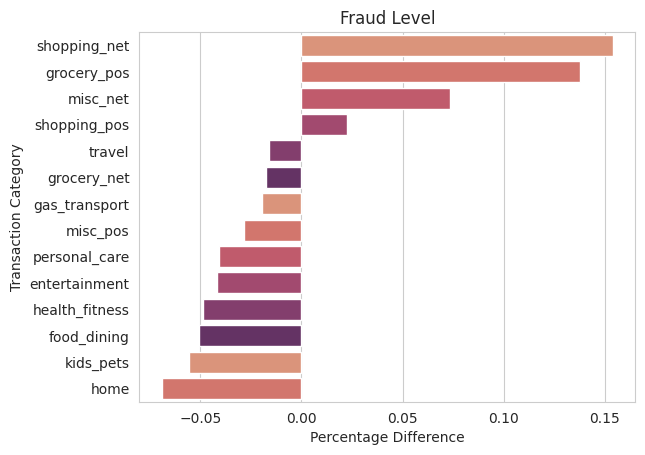

In [ ]:
custom_palette = sns.color_palette("flare")
ax = sns.barplot(y='category', x='fraud_level',
                 data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Fraud Level');

As shown above, some categories are more favourable to have frauds than others.


**FEATURE ENGINEERING**

**Dataset 1**

Let's analyze if the time in a day has any impact.

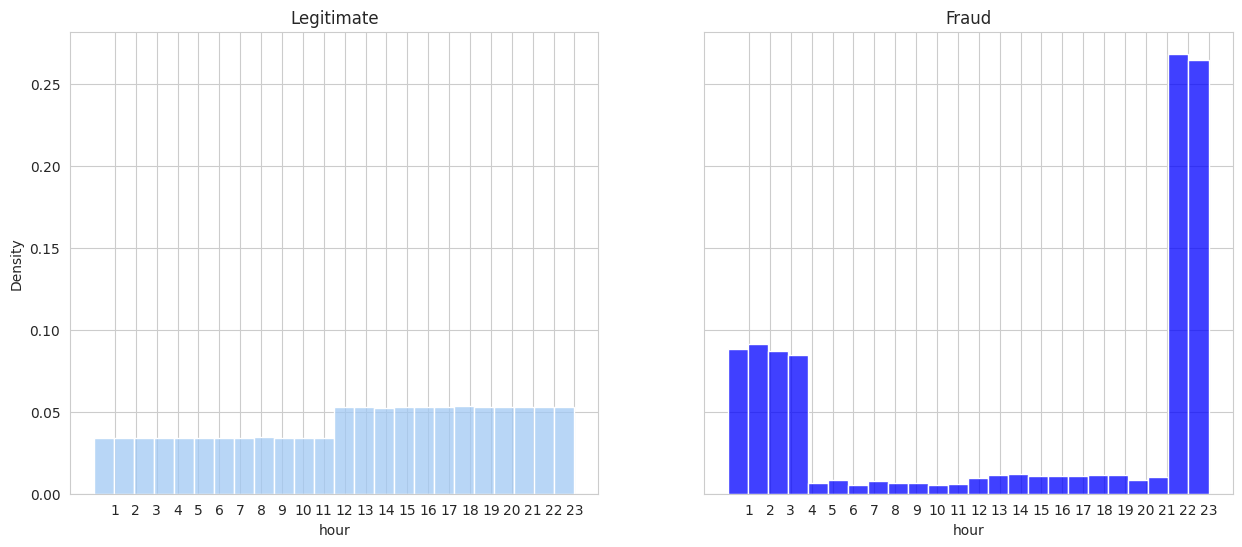

In [ ]:
# Add hours

train_df1['hour'] = pd.to_datetime(train_df1['trans_date_trans_time']).dt.hour
test_df1['hour'] = pd.to_datetime(test_df1['trans_date_trans_time']).dt.hour

# Hours distribution
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='hour', data=train_df1[train_df1["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1)
ax2 = sns.histplot(x='hour', data=train_df1[train_df1["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="blue")
ax1.set_title("Legitimate")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 24))
ax2.set_xticks(np.arange(1, 24));

As we can see, there is a clear pattern when it comes to hour in the day. Fraudulent payments happens more frequently around midnight than in normal transactions.

In [ ]:
train_df1['hourEnc'] = 0
train_df1.loc[train_df1.hour < 5,'hourEnc'] = 1
train_df1.loc[train_df1.hour > 21,'hourEnc'] = 1

test_df1['hourEnc'] = 0
test_df1.loc[test_df1.hour < 5,'hourEnc'] = 1
test_df1.loc[test_df1.hour > 21,'hourEnc'] = 1

Let's do the same for months.

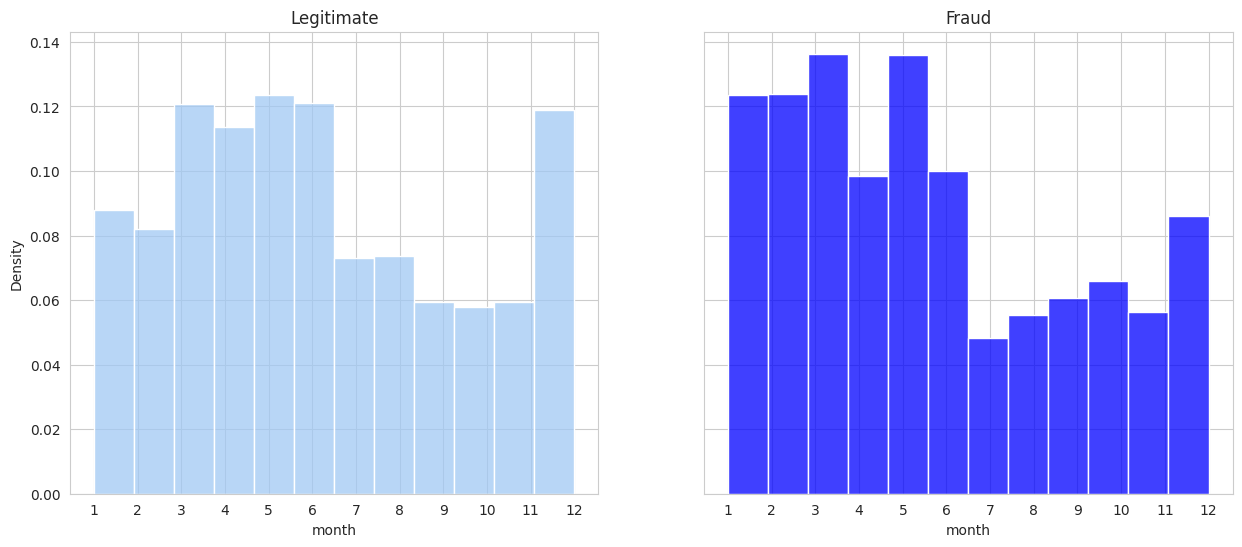

In [ ]:
# Add months

train_df1['month'] = pd.to_datetime(train_df1['trans_date_trans_time']).dt.month
test_df1['month'] = pd.to_datetime(test_df1['trans_date_trans_time']).dt.month

# Month Distribution
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='month', data=train_df1[train_df1["is_fraud"] == 0],
                   stat="density", bins=12, ax=ax1)
ax2 = sns.histplot(x='month', data=train_df1[train_df1["is_fraud"] == 1],
                   stat="density", bins=12, ax=ax2, color="blue")
ax1.set_title("Legitimate")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 13))
ax2.set_xticks(np.arange(1, 13));

In [ ]:
# Define the suspicious transaction categories
suspicious_categories = ['shopping_net', 'grocery_pos', 'misc_net', 'shopping_pos']

# Create a new feature called 'suspicious_transactions' and initialize it with 0
train_df1['suspicious_transactions'] = 0

# Set the value of 'suspicious_transactions' to 1 for transactions in suspicious categories
# and occurring between 2100 to 0500 hours
train_df1.loc[(train_df1['hour'] < 5) | (train_df1['hour'] > 21) & train_df1['category'].isin(suspicious_categories), 'suspicious_transactions'] = 1

# Define the suspicious transaction categories
suspicious_categories = ['shopping_net', 'grocery_pos', 'misc_net', 'shopping_pos']

# Create a new feature called 'suspicious_transactions' and initialize it with 0
test_df1['suspicious_transactions'] = 0

# Set the value of 'suspicious_transactions' to 1 for transactions in suspicious categories
# and occurring between 2100 to 0500 hours
test_df1.loc[(test_df1['hour'] < 5) | (test_df1['hour'] > 21) & test_df1['category'].isin(suspicious_categories), 'suspicious_transactions'] = 1

In [ ]:
# Log Transformation
train_df1['log_amount'] = np.log1p(train_df1['amt'])  # Adding 1 to avoid log(0)
test_df1['log_amount'] = np.log1p(test_df1['amt'])  # Adding 1 to avoid log(0)

# Binning for 'amount'
bins = [0, 50, 100, 200, 500, 1000, np.inf]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+']
train_df1['amount_bin'] = pd.cut(train_df1['amt'], bins=bins, labels=labels)
test_df1['amount_bin'] = pd.cut(test_df1['amt'], bins=bins, labels=labels)

# Label encoding for 'amount_bin'
label_encoder = LabelEncoder()
train_df1['amount_bin_encoded'] = label_encoder.fit_transform(train_df1['amount_bin'])
test_df1['amount_bin_encoded'] = label_encoder.transform(test_df1['amount_bin'])

# Now, you can remove the original 'amount_bin' column if needed
train_df1.drop(columns=['amount_bin'], inplace=True)
test_df1.drop(columns=['amount_bin'], inplace=True)

# Interaction Features
train_df1['hour_amount_interaction'] = train_df1['hour'] * train_df1['amt']
test_df1['hour_amount_interaction'] = test_df1['hour'] * test_df1['amt']

# Additional Feature Engineering Ideas:
# - Standardization/Normalization
# - Polynomial Features
# - Outlier Detection/Handling
# - Feature Encoding (e.g., one-hot encoding for categorical variables)
# - Feature Selection (e.g., using feature importance from a model)

# Display the first few rows of the modified DataFrame
print(train_df1.head())

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...  merch_lat  merch_long  \
0                561 Perry Cove  Moravian Falls  ...  36.011293  -82.048315   
1  43039 Riley Greens Su

Let's see how the Age distribution behaves for fraud and non-fraud transactions.

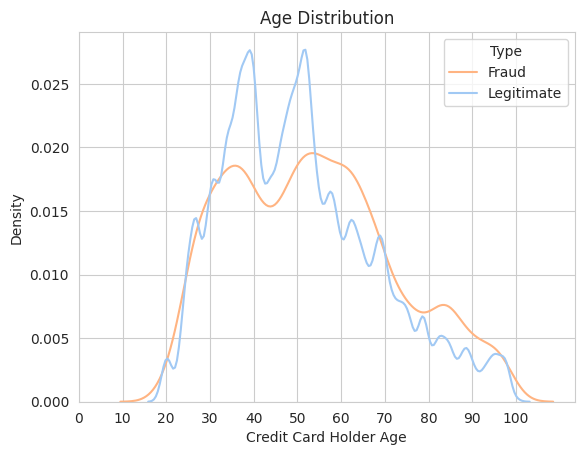

In [ ]:
# Calculate age

train_df1['age'] = dt.date.today().year-pd.to_datetime(train_df1['dob']).dt.year
test_df1['age'] = dt.date.today().year-pd.to_datetime(test_df1['dob']).dt.year

# Age Distribution
ax = sns.kdeplot(x='age', data=train_df1, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type', labels=['Fraud', 'Legitimate']);

We can observe that in non-fraudulent transactions, there is a peak around 35 years and 40 years, and another one around 50 years. On the other hand, in fraudulent operations, we observe a smoother distribution, with peaks around 35 years and in the range of 50 years to 55 years.

In [ ]:
# Remove non-useful columns
columns_to_drop = ['first', 'unix_time', 'dob', 'cc_num', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time']
train_df1 = train_df1.drop(columns_to_drop, axis=1)
test_df1 = test_df1.drop(columns_to_drop, axis=1)
train_df1.head(2)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,hourEnc,month,suspicious_transactions,log_amount,amount_bin_encoded,hour_amount_interaction,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1,1,1,1.786747,0,0.0,36
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1,1,1,4.684259,2,0.0,46


In [ ]:
# Clean merchant column
train_df1['merchant'] = train_df1['merchant'].apply(lambda x : x.replace('fraud_',''))
test_df1['merchant'] = test_df1['merchant'].apply(lambda x : x.replace('fraud_',''))

In [ ]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   merchant                 1296675 non-null  object 
 1   category                 1296675 non-null  object 
 2   amt                      1296675 non-null  float64
 3   last                     1296675 non-null  object 
 4   gender                   1296675 non-null  object 
 5   lat                      1296675 non-null  float64
 6   long                     1296675 non-null  float64
 7   city_pop                 1296675 non-null  int64  
 8   job                      1296675 non-null  object 
 9   merch_lat                1296675 non-null  float64
 10  merch_long               1296675 non-null  float64
 11  is_fraud                 1296675 non-null  int64  
 12  hour                     1296675 non-null  int32  
 13  hourEnc                  1296675 non-null  int6

In [ ]:
train_df1.describe(include='object')

,merchant,category,last,gender,job
count,1296675,1296675,1296675,1296675,1296675
unique,693,14,481,2,494
top,Kilback LLC,gas_transport,Smith,F,Film/video editor
freq,4403,131659,28794,709863,9779


**DATA ENCODING**

In [ ]:
# Applying label encoding
train_df1['gender'] = train_df1['gender'].map({'F': 0, 'M': 1})
test_df1['gender'] = test_df1['gender'].map({'F': 0, 'M': 1})

# Applying WOE encoding
for col in ['job','merchant', 'category', 'lat', 'last']:
    train_df1[col] = WOEEncoder().fit_transform(train_df1[col],train_df1['is_fraud'])
    test_df1[col] = WOEEncoder().fit_transform(test_df1[col],test_df1['is_fraud'])

In [ ]:
train_df1.head(3)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,hourEnc,month,suspicious_transactions,log_amount,amount_bin_encoded,hour_amount_interaction,age
0,0.959326,0.924914,4.97,-2.469513,0,36.0788,-81.1781,3495,-1.080186,36.011293,-82.048315,0,0,1,1,1,1.786747,0,0.0,36
1,0.663187,0.898799,107.23,-0.673638,0,48.8878,-118.2105,149,-0.904144,49.159047,-118.186462,0,0,1,1,1,4.684259,2,0.0,46
2,-0.790166,-0.847622,220.11,0.433257,1,42.1808,-112.2620,4154,1.120434,43.150704,-112.154481,0,0,1,1,1,5.398660,3,0.0,62


In [ ]:
train_df1.corr()

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,hourEnc,month,suspicious_transactions,log_amount,amount_bin_encoded,hour_amount_interaction,age
merchant,1.000000,0.897631,0.092476,0.002634,-0.012504,0.000489,-0.003288,0.000313,0.000707,0.000446,-0.003264,0.068012,-0.422429,0.142316,-0.001239,0.317714,0.000002,-0.002860,-0.004416,-0.002705
category,0.897631,1.000000,0.100344,0.002538,-0.014419,0.000715,-0.004047,-0.000067,0.000974,0.000645,-0.004020,0.068129,-0.469761,0.157479,-0.001002,0.352985,0.003447,0.002506,-0.007244,-0.000824
amt,0.092476,0.100344,1.000000,0.014007,0.001034,-0.001926,-0.000187,0.005818,0.010639,-0.001873,-0.000151,0.219404,-0.022811,0.033615,-0.001748,0.051302,0.496001,0.196840,0.923405,-0.009748
last,0.002634,0.002538,0.014007,1.000000,0.088725,-0.009078,-0.000248,-0.035363,0.420611,-0.009220,-0.000340,0.061733,-0.024403,0.015294,-0.000729,0.017058,0.018575,0.021838,0.011971,0.064176
gender,-0.012504,-0.014419,0.001034,0.088725,1.000000,0.042935,0.050404,-0.028649,0.122636,0.042645,0.050350,0.007642,-0.037835,0.012631,-0.000215,0.011950,0.036764,0.081563,0.004593,0.004976
lat,0.000489,0.000715,-0.001926,-0.009078,0.042935,1.000000,-0.015533,-0.155730,0.021294,0.993592,-0.015509,0.001894,-0.011508,0.003793,-0.001072,0.003089,0.009887,0.016154,-0.001812,0.047845
long,-0.003288,-0.004047,-0.000187,-0.000248,0.050404,-0.015533,1.000000,-0.052715,0.043489,-0.015452,0.999120,0.001721,-0.002290,0.002988,-0.001213,0.002853,-0.000603,0.007547,0.000998,-0.030231
city_pop,0.000313,-0.000067,0.005818,-0.035363,-0.028649,-0.155730,-0.052715,1.000000,-0.011598,-0.154781,-0.052687,0.002136,0.020381,-0.005676,0.000137,-0.005935,-0.003976,-0.012454,0.006293,-0.091271
job,0.000707,0.000974,0.010639,0.420611,0.122636,0.021294,0.043489,-0.011598,1.000000,0.021037,0.043426,0.062142,-0.037480,0.018948,0.000957,0.022462,0.013587,0.021208,0.007416,0.071784
merch_lat,0.000446,0.000645,-0.001873,-0.009220,0.042645,0.993592,-0.015452,-0.154781,0.021037,1.000000,-0.015431,0.001741,-0.011378,0.003830,-0.001116,0.003077,0.009852,0.016045,-0.001788,0.047458


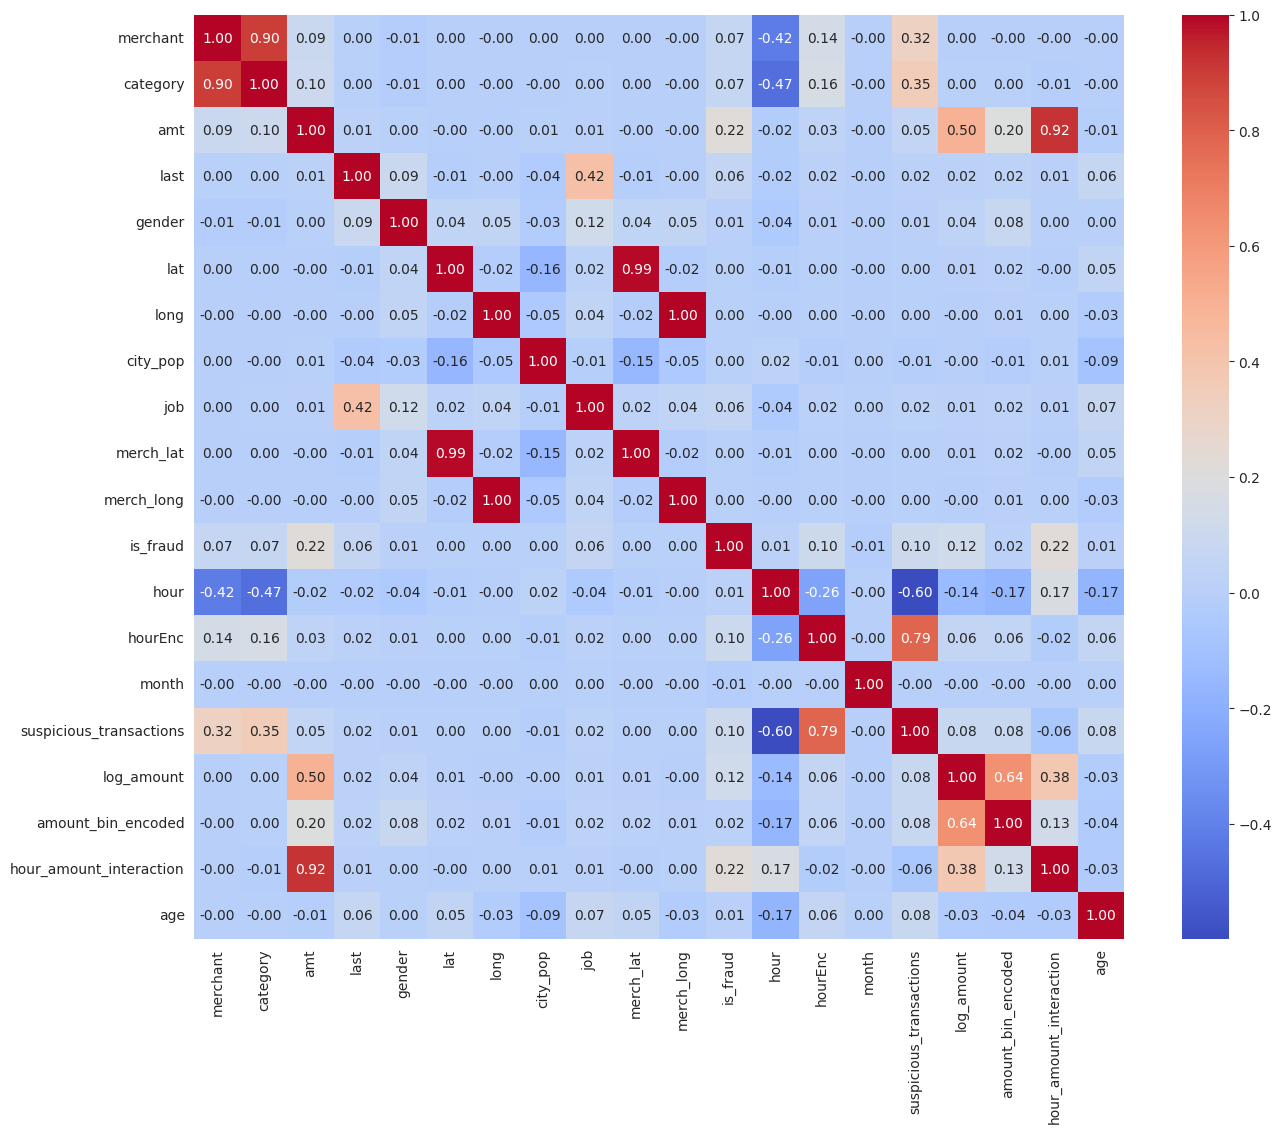

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(train_df1.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

As the testing dataset is very large, its runtime of the code is very high. So, we will take only 10% of the total testing dataset to check.

In [ ]:
test_df1 = test_df1.sample(frac=0.1, random_state=42)

# Check the shape of the sampled dataset
print("Shape of sampled test dataset:", test_df1.shape)

Shape of sampled test dataset: (5557, 20)


**Case 1: Undersampling**

As our data is imbalanced, we will use Resampling Techniques.

Under sampling technique:

In [ ]:
# Separate majority and minority classes for train dataset
majority_class = train_df1[train_df1['is_fraud'] == 0]
minority_class = train_df1[train_df1['is_fraud'] == 1]

# Downsample majority class
downsampled_majority = resample(majority_class,
                                 replace=False,  # sample without replacement
                                 n_samples=len(minority_class),  # match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
downsampled_train_data = pd.concat([downsampled_majority, minority_class])

In [ ]:
# Separate features and labels again
X_train1_downsampled = downsampled_train_data.drop('is_fraud', axis=1)
y_train1_downsampled = downsampled_train_data['is_fraud']
X_test1 = test_df1.drop('is_fraud', axis=1)
y_test1 = test_df1['is_fraud']

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train1_downsampled_scaled = scaler.fit_transform(X_train1_downsampled)
X_test1_scaled = scaler.transform(X_test1)

In [ ]:
# Checking newly created data
print('Current length of the training set: ', len(y_train1_downsampled))

Current length of the training set:  15012


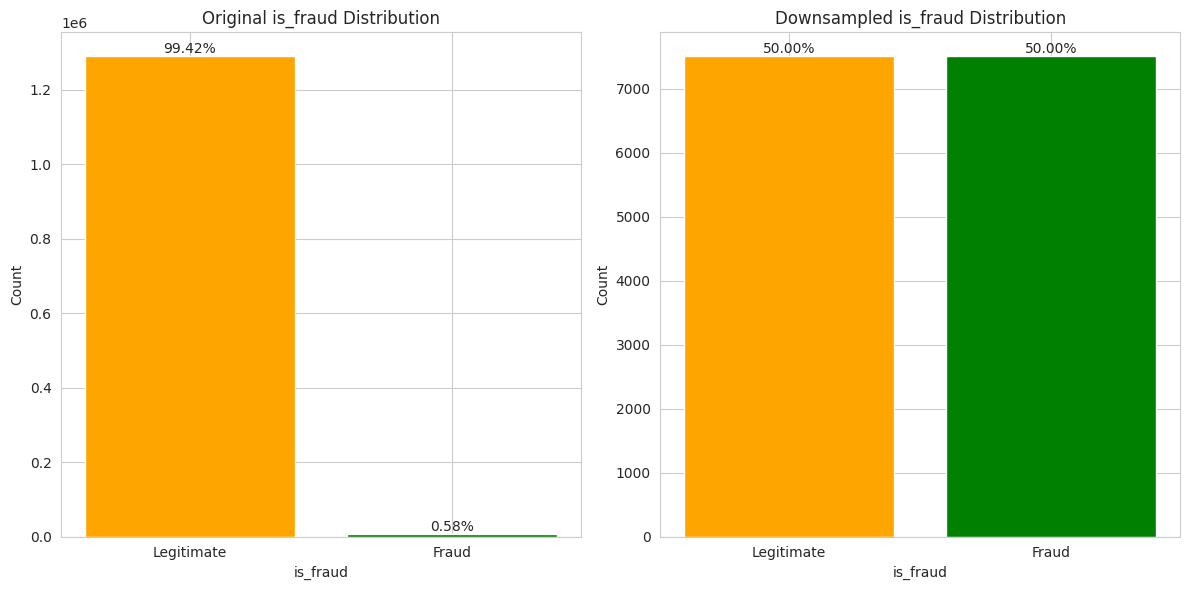

In [ ]:
# Count the occurrences of each class in the original dataset
original_is_fraud_counts = train_df1["is_fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_is_fraud_counts = y_train1_downsampled.value_counts()

# Calculate the percentage of each class
original_percentages = original_is_fraud_counts / len(train_df1) * 100
downsampled_percentages = downsampled_is_fraud_counts / len(y_train1_downsampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original is_fraud distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_is_fraud_counts.index, original_is_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original is_fraud Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(original_is_fraud_counts.index, ['Legitimate', 'Fraud'])

# Bar chart for downsampled is_fraud distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_is_fraud_counts.index, downsampled_is_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled is_fraud Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(downsampled_is_fraud_counts.index, ['Legitimate', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

**MACHINE LEARNING MODEL TRAINING**

[1] Logistic Regression -> LR

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train1_downsampled_scaled, y_train1_downsampled)
predict_LR = LR_model.predict(X_test1_scaled)
print(classification_report(y_test1, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test1)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_LR = LR_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test1, y_probs_LR)

print('AUC for Logistic Regression: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     55356
           1       0.04      0.95      0.08       216

    accuracy                           0.91     55572
   macro avg       0.52      0.93      0.51     55572
weighted avg       1.00      0.91      0.95     55572

Logistic Regression accuracy is: 91.02%
AUC for Logistic Regression: 0.98


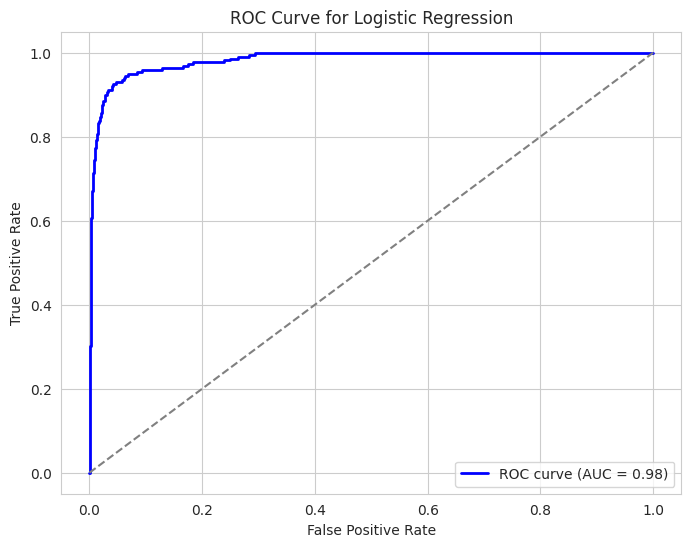

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

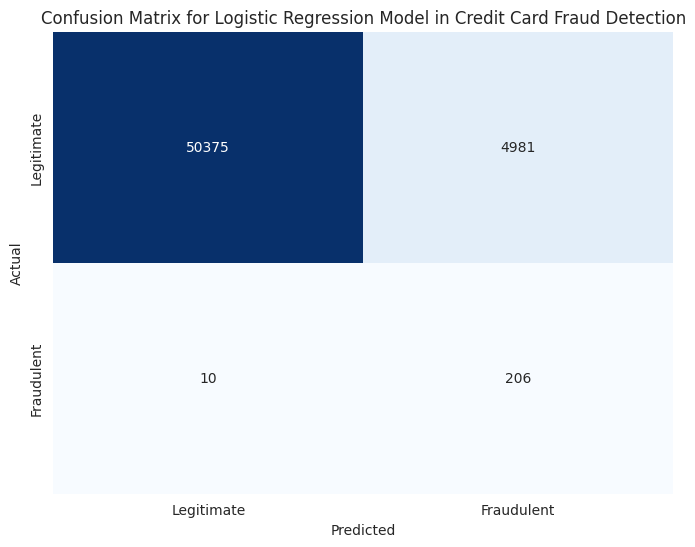

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_LR, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_LR]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.039715
1     Recall  0.953704
2   F1-Score  0.076254
3   Accuracy  0.910189
4        AUC  0.983026


[2] Decision Tree Model (ID3)

In [ ]:
DT_model = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT_model.fit(X_train1_downsampled_scaled, y_train1_downsampled)
predict_DT = DT_model.predict(X_test1_scaled)
print(classification_report(y_test1, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test1)
print('Decision Tree model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = DT_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test1, y_probs_DT)

print('AUC for Decision Tree Classifier: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     55356
           1       0.10      0.78      0.17       216

    accuracy                           0.97     55572
   macro avg       0.55      0.88      0.58     55572
weighted avg       1.00      0.97      0.98     55572

Decision Tree model accuracy is: 97.04%
AUC for Decision Tree Classifier: 0.88


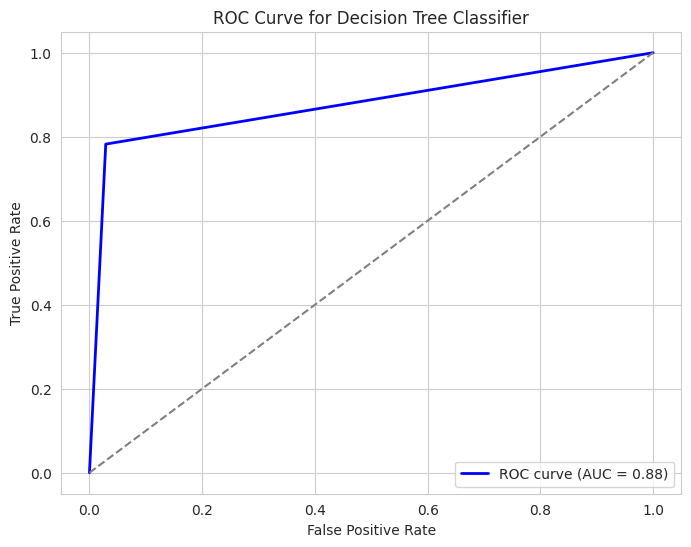

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

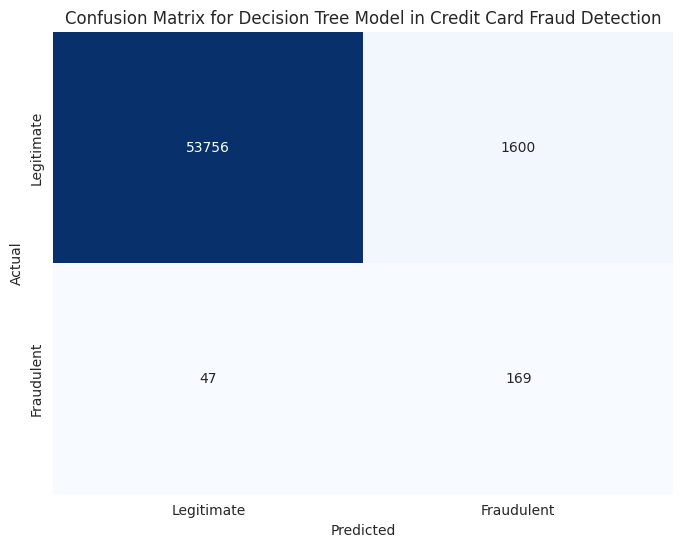

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_DT, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_DT]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.095534
1     Recall  0.782407
2   F1-Score  0.170277
3   Accuracy  0.970363
4        AUC  0.876752


[3] XGB Classifier

In [ ]:
# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train1_downsampled_scaled, y_train1_downsampled)

# Make predictions on the test set
predict_XGB = XGB_model.predict(X_test1_scaled)

# Evaluate the model
print(classification_report(y_test1, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test1)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_XGB = XGB_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_XGB)

# Calculate AUC
auc_XGB = roc_auc_score(y_test1, y_probs_XGB)

print('AUC for XGBoost classifier: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     55356
           1       0.07      0.96      0.13       216

    accuracy                           0.95     55572
   macro avg       0.53      0.95      0.55     55572
weighted avg       1.00      0.95      0.97     55572

XGBoost model accuracy is: 94.91%
AUC for XGBoost classifier: 0.99


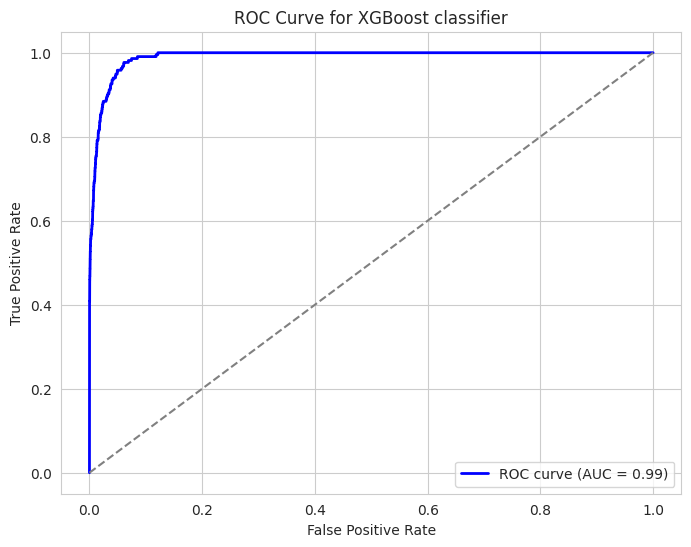

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

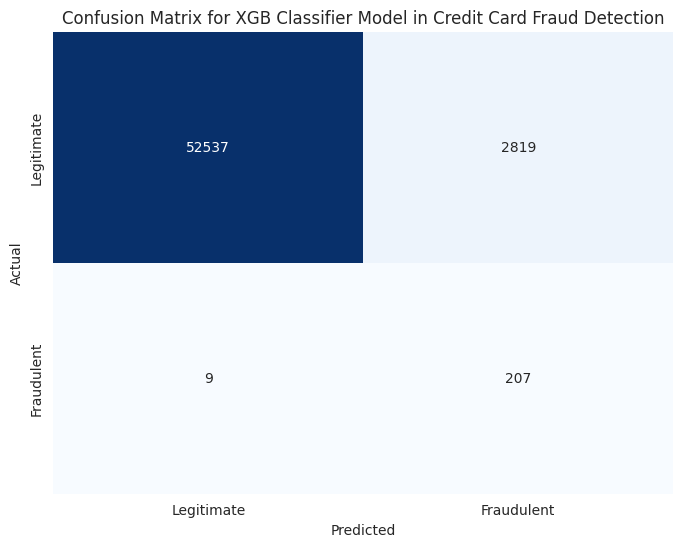

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_XGB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGB Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_XGB, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_XGB]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.068407
1     Recall  0.958333
2   F1-Score  0.127699
3   Accuracy  0.949111
4        AUC  0.990023


[4] Random Forest Classifier

In [ ]:
# Initialize and train the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train1_downsampled_scaled, y_train1_downsampled)

predict_RF = RF_model.predict(X_test1_scaled)

# Evaluate the model
print(classification_report(y_test1, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test1)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = RF_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test1, y_probs_RF)

print('AUC for Random Forest classifier: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     55356
           1       0.14      0.95      0.24       216

    accuracy                           0.98     55572
   macro avg       0.57      0.97      0.62     55572
weighted avg       1.00      0.98      0.99     55572

Random Forest model accuracy is: 97.71%
AUC for Random Forest classifier: 1.00


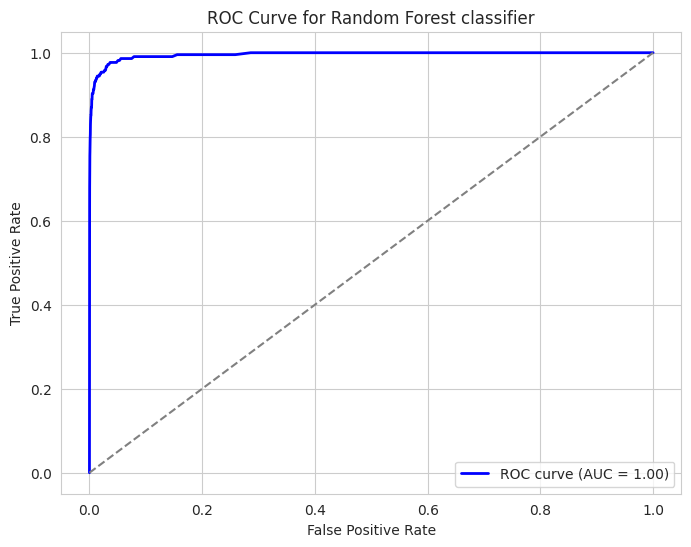

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

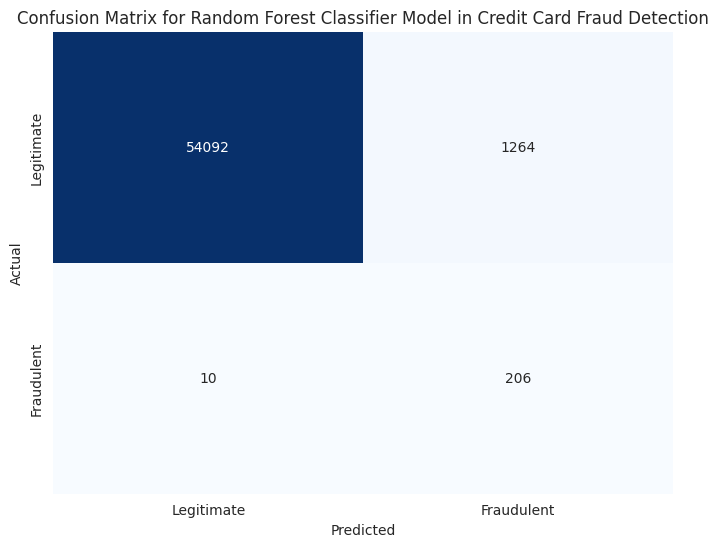

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_RF, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_RF]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.140136
1     Recall  0.953704
2   F1-Score  0.244365
3   Accuracy  0.977075
4        AUC  0.995453


[5] K-Nearest Neighbors (KNN) Model

In [ ]:
# Instantiate KNN model
KNN_model = KNeighborsClassifier()

# Train the KNN model
KNN_model.fit(X_train1_downsampled_scaled, y_train1_downsampled)

# Make predictions on the test set
predict_KNN = KNN_model.predict(X_test1_scaled)

# Evaluate the performance of KNN model
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(classification_report(y_test1, predict_KNN))

# Calculate accuracy
KNN_accuracy = accuracy_score(predict_KNN, y_test1)
print('K-Nearest Neighbors (KNN) accuracy is: {:.2f}%'.format(KNN_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = KNN_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test1, y_probs_KNN)

print('AUC for K-Nearest Neighbors (KNN): {:.2f}'.format(auc_KNN))

Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     55356
           1       0.03      0.94      0.06       216

    accuracy                           0.89     55572
   macro avg       0.52      0.92      0.50     55572
weighted avg       1.00      0.89      0.94     55572

K-Nearest Neighbors (KNN) accuracy is: 89.33%
AUC for K-Nearest Neighbors (KNN): 0.96


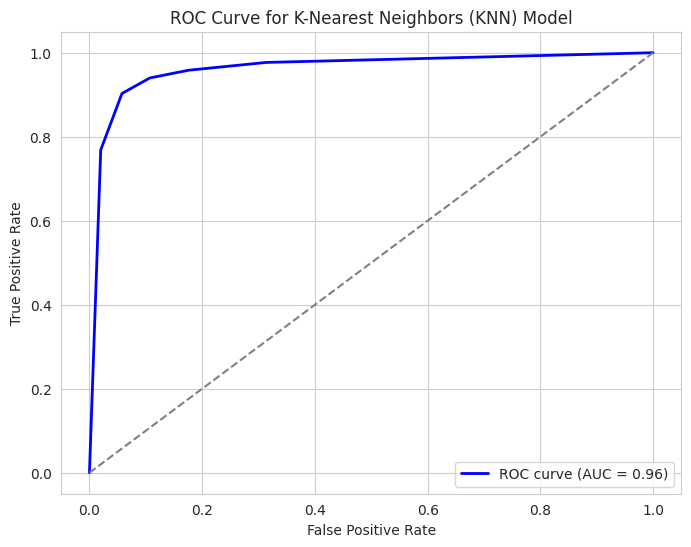

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN) Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

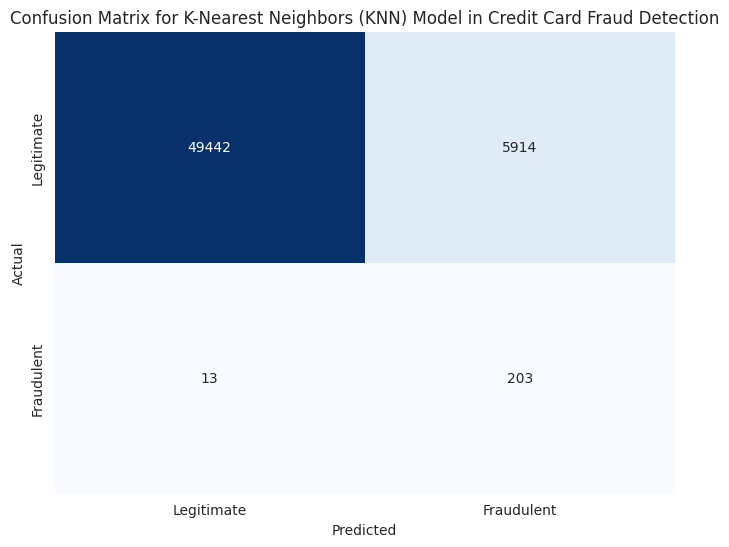

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_KNN, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_KNN]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.033186
1     Recall  0.939815
2   F1-Score  0.064109
3   Accuracy  0.893346
4        AUC  0.961712


In [ ]:
# Define the metrics for each model and sampling technique

# Define the classification report dictionary for logistic regression
classification_report_dict_LR = classification_report(y_test1, predict_LR, output_dict=True)

metrics_logistic_regression = {
    'precision': "{:.2f}".format(classification_report_dict_LR['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_LR['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_LR['1']['f1-score']),
    'accuracy': "{:.2f}".format(LR_accuracy),
    'auc': "{:.2f}".format(auc_LR)
}

# Define the classification report dictionary for decision tree
classification_report_dict_DT = classification_report(y_test1, predict_DT, output_dict=True)

metrics_decision_tree = {
    'precision': "{:.2f}".format(classification_report_dict_DT['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_DT['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_DT['1']['f1-score']),
    'accuracy': "{:.2f}".format(DT_accuracy),
    'auc': "{:.2f}".format(auc_DT)
}

# Define the classification report dictionary for XGB Classifier
classification_report_dict_XGB = classification_report(y_test1, predict_XGB, output_dict=True)

metrics_xgb_classifier = {
    'precision': "{:.2f}".format(classification_report_dict_XGB['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_XGB['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_XGB['1']['f1-score']),
    'accuracy': "{:.2f}".format(XGB_accuracy),
    'auc': "{:.2f}".format(auc_XGB)
}

# Define the classification report dictionary for Random Forest
classification_report_dict_RF = classification_report(y_test1, predict_RF, output_dict=True)

metrics_random_forest = {
    'precision': "{:.2f}".format(classification_report_dict_RF['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_RF['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_RF['1']['f1-score']),
    'accuracy': "{:.2f}".format(RF_accuracy),
    'auc': "{:.2f}".format(auc_RF)
}

# Define the classification report dictionary for KNeighbors Classifier
classification_report_dict_KNN = classification_report(y_test1, predict_KNN, output_dict=True)

metrics_kneighbors = {
    'precision': "{:.2f}".format(classification_report_dict_KNN['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_KNN['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_KNN['1']['f1-score']),
    'accuracy': "{:.2f}".format(KNN_accuracy),
    'auc': "{:.2f}".format(auc_KNN)
}

# Create a DataFrame to store the metrics
metrics_df_undersampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGB Classifier', 'Random Forest', 'KNeighbors Classifier'],
    'Precision': [metrics_logistic_regression['precision'], metrics_decision_tree['precision'], metrics_xgb_classifier['precision'], metrics_random_forest['precision'], metrics_kneighbors['precision']],
    'Recall': [metrics_logistic_regression['recall'], metrics_decision_tree['recall'], metrics_xgb_classifier['recall'], metrics_random_forest['recall'], metrics_kneighbors['recall']],
    'F1-Score': [metrics_logistic_regression['f1-score'], metrics_decision_tree['f1-score'], metrics_xgb_classifier['f1-score'], metrics_random_forest['f1-score'], metrics_kneighbors['f1-score']],
    'Accuracy': [metrics_logistic_regression['accuracy'], metrics_decision_tree['accuracy'], metrics_xgb_classifier['accuracy'], metrics_random_forest['accuracy'], metrics_kneighbors['accuracy']],
    'AUC': [metrics_logistic_regression['auc'], metrics_decision_tree['auc'], metrics_xgb_classifier['auc'], metrics_random_forest['auc'], metrics_kneighbors['auc']]
})

# Print the DataFrame
print("Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 1 with Undersampling:")
print(metrics_df_undersampling)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for dataset 1 with Undersampling:
                   Model Precision Recall F1-Score Accuracy   AUC
0    Logistic Regression      0.04   0.95     0.08     0.91  0.98
1          Decision Tree      0.10   0.78     0.17     0.97  0.88
2         XGB Classifier      0.07   0.96     0.13     0.95  0.99
3          Random Forest      0.14   0.95     0.24     0.98  1.00
4  KNeighbors Classifier      0.03   0.94     0.06     0.89  0.96


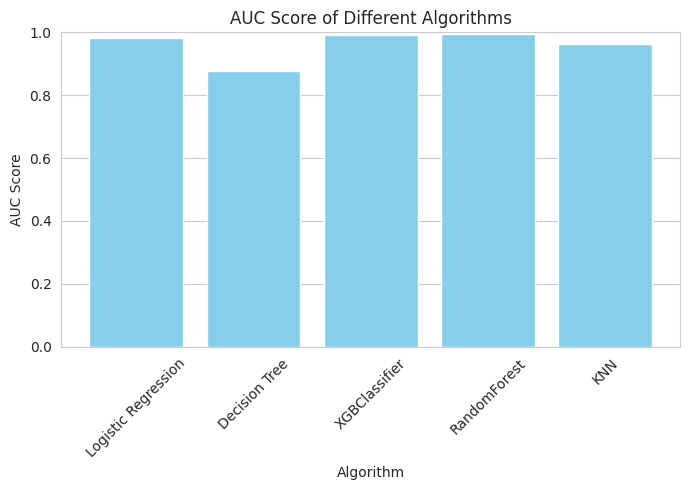

In [ ]:
Algorithms = ['Logistic Regression', 'Decision Tree', 'XGBClassifier', 'RandomForest', 'KNN']
AUC = [auc_LR, auc_DT, auc_XGB, auc_RF, auc_KNN]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC Score':AUC})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC Score'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('AUC Score')
plt.title('AUC Score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (AUC Score ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Over Sampling**

**Case 2: SMOTE Oversampling**

In [ ]:
# Spliting the dataset
X_train1_SMOTE = train_df1.drop('is_fraud', axis=1)
y_train1_SMOTE = train_df1['is_fraud']
X_test1 = test_df1.drop('is_fraud', axis=1)
y_test1 = test_df1['is_fraud']

In [ ]:
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train1_SMOTE, y_train1_SMOTE = smote.fit_resample(X_train1_SMOTE, y_train1_SMOTE)

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train1_SMOTE_scaled = scaler.fit_transform(X_train1_SMOTE)
X_test1_scaled = scaler.transform(X_test1)

In [ ]:
# checking newly created data
print('Current length of the training set: ', len(y_train1_SMOTE))

Current length of the training set:  2578338


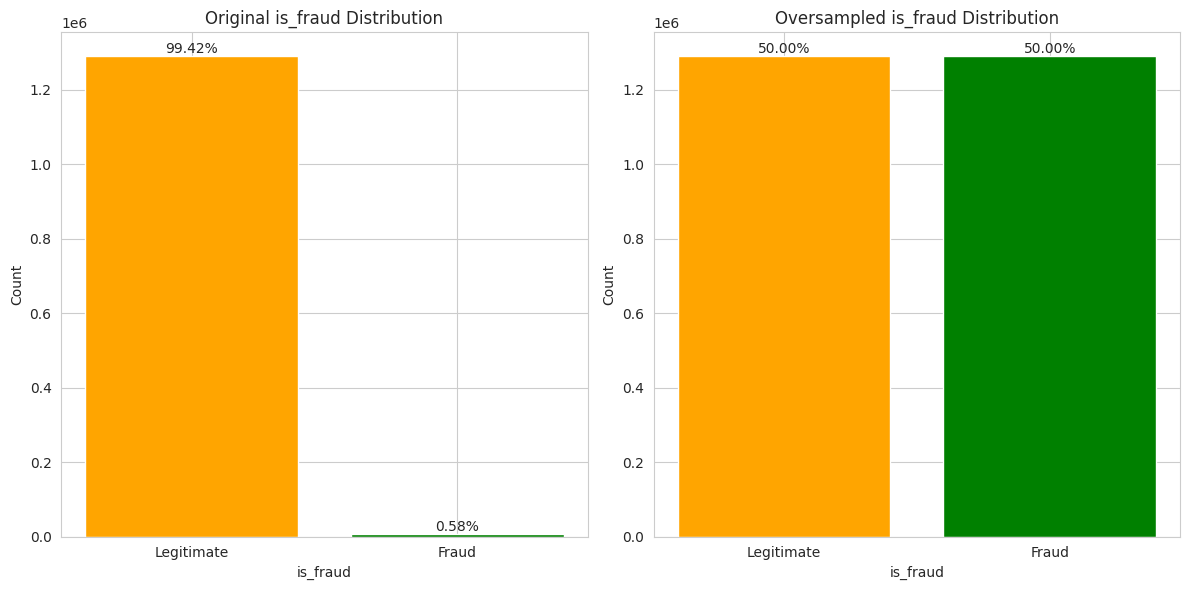

In [ ]:
# Count the occurrences of each class in the original dataset
original_is_fraud_counts = train_df1["is_fraud"].value_counts()

# Count the occurrences of each class in the oversampled dataset
oversampled_is_fraud_counts = y_train1_SMOTE.value_counts()

# Calculate the percentage of each class
original_percentages = original_is_fraud_counts / len(train_df1) * 100
oversampled_percentages = oversampled_is_fraud_counts / len(y_train1_SMOTE) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original is_fraud distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_is_fraud_counts.index, original_is_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original is_fraud Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(original_is_fraud_counts.index, ['Legitimate', 'Fraud'])

# Bar chart for oversampled is_fraud distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(oversampled_is_fraud_counts.index, oversampled_is_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, oversampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Oversampled is_fraud Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(oversampled_is_fraud_counts.index, ['Legitimate', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

[1] Logistic Regression -> LR

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train1_SMOTE_scaled, y_train1_SMOTE)
predict_LR = LR_model.predict(X_test1_scaled)
print(classification_report(y_test1, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test1)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_LR = LR_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test1, y_probs_LR)

print('AUC for Logistic Regression: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     55356
           1       0.04      0.95      0.07       216

    accuracy                           0.91     55572
   macro avg       0.52      0.93      0.51     55572
weighted avg       1.00      0.91      0.95     55572

Logistic Regression accuracy is: 90.53%
AUC for Logistic Regression: 0.98


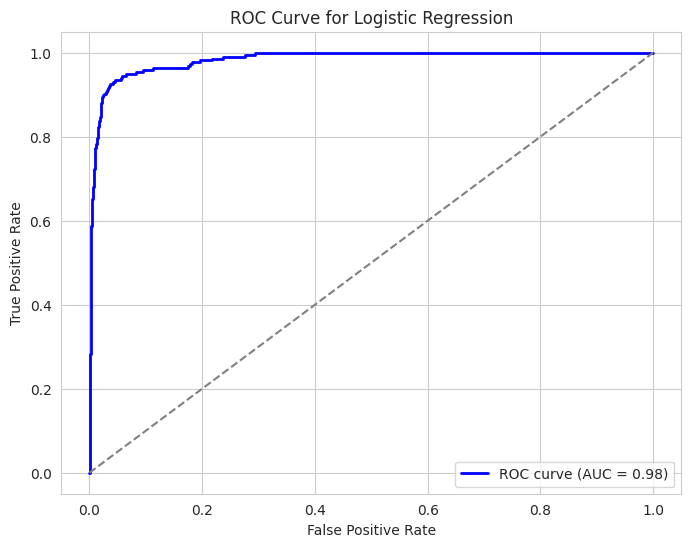

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

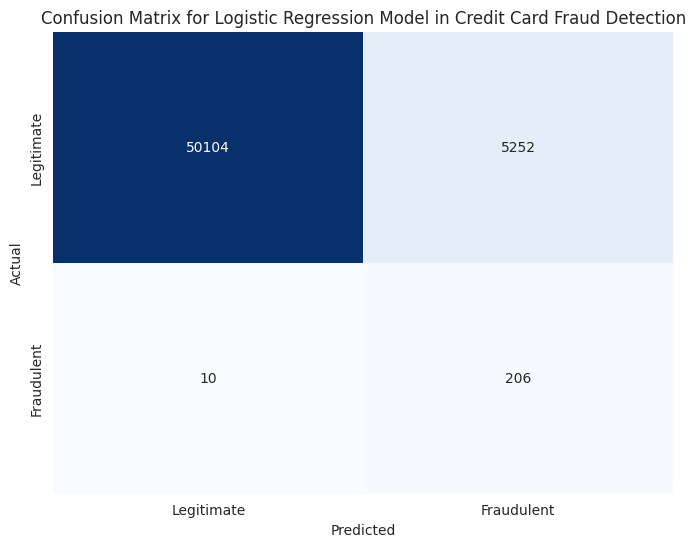

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_LR, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_LR]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.037743
1     Recall  0.953704
2   F1-Score  0.072612
3   Accuracy  0.905312
4        AUC  0.983779


[2] Decision Tree Model (ID3)

In [ ]:
DT_model = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT_model.fit(X_train1_SMOTE_scaled, y_train1_SMOTE)
predict_DT = DT_model.predict(X_test1_scaled)
print(classification_report(y_test1, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test1)
print('Decision Tree model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = DT_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test1, y_probs_DT)

print('AUC for Decision Tree Classifier: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     55356
           1       0.09      0.78      0.17       216

    accuracy                           0.97     55572
   macro avg       0.55      0.88      0.58     55572
weighted avg       1.00      0.97      0.98     55572

Decision Tree model accuracy is: 97.01%
AUC for Decision Tree Classifier: 0.88


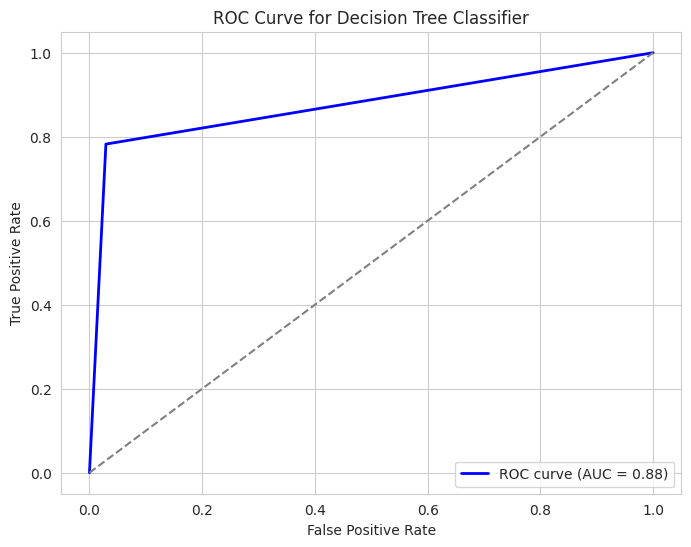

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

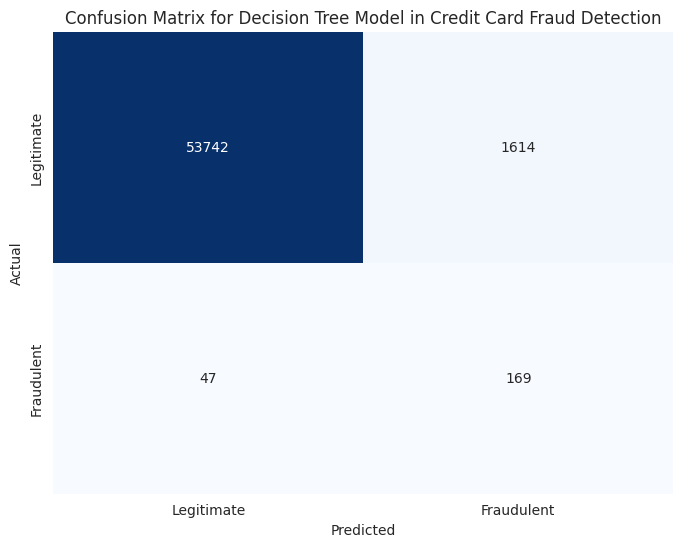

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_DT, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_DT]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.094784
1     Recall  0.782407
2   F1-Score  0.169085
3   Accuracy  0.970111
4        AUC  0.876625


[3] XGB Classifier

In [ ]:
# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train1_SMOTE_scaled, y_train1_SMOTE)

# Make predictions on the test set
predict_XGB = XGB_model.predict(X_test1_scaled)

# Evaluate the model
print(classification_report(y_test1, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test1)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_XGB = XGB_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_XGB)

# Calculate AUC
auc_XGB = roc_auc_score(y_test1, y_probs_XGB)

print('AUC for XGBoost classifier: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     55356
           1       0.03      0.99      0.06       216

    accuracy                           0.87     55572
   macro avg       0.51      0.93      0.49     55572
weighted avg       1.00      0.87      0.93     55572

XGBoost model accuracy is: 87.31%
AUC for XGBoost classifier: 0.99


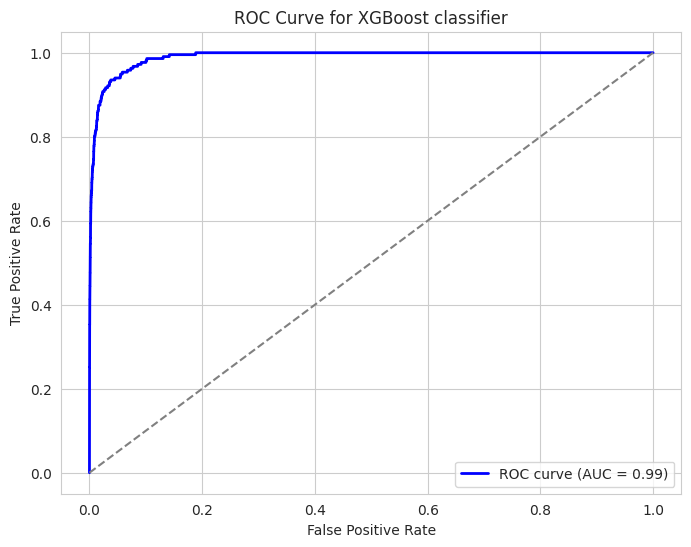

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

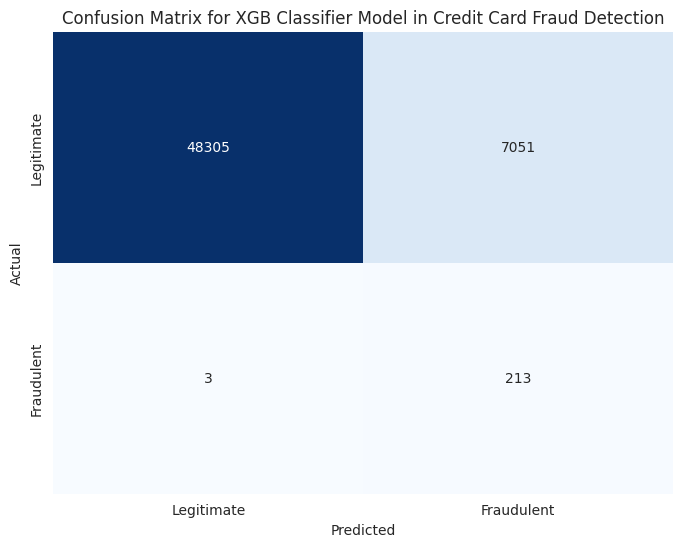

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_XGB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGB Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_XGB, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_XGB]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.029323
1     Recall  0.986111
2   F1-Score  0.056952
3   Accuracy  0.873066
4        AUC  0.990205


[4] Random Forest Classifier

In [ ]:
# Initialize and train the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train1_SMOTE_scaled, y_train1_SMOTE)

predict_RF = RF_model.predict(X_test1_scaled)

# Evaluate the model
print(classification_report(y_test1, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test1)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = RF_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test1, y_probs_RF)

print('AUC for Random Forest model: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     55356
           1       0.10      0.89      0.18       216

    accuracy                           0.97     55572
   macro avg       0.55      0.93      0.58     55572
weighted avg       1.00      0.97      0.98     55572

Random Forest model accuracy is: 96.88%
AUC for Random Forest model: 0.98


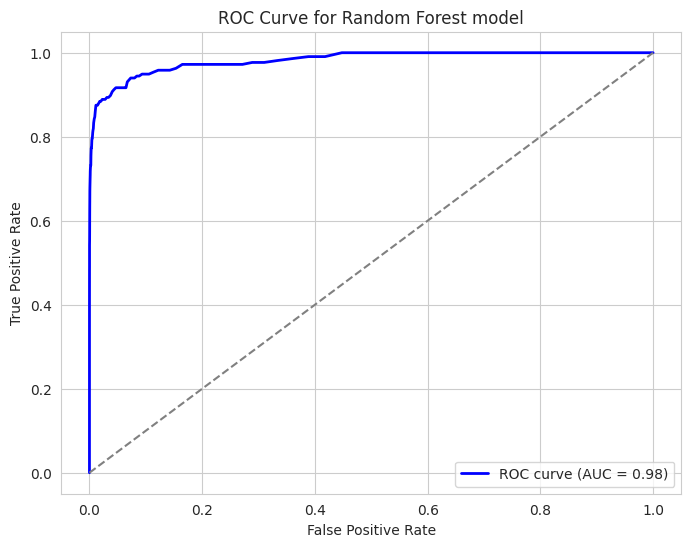

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

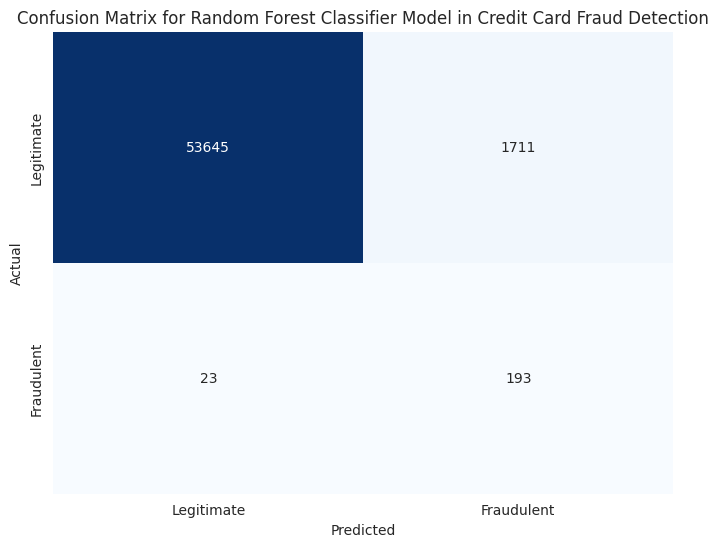

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_RF, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_RF]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.101366
1     Recall  0.893519
2   F1-Score  0.182075
3   Accuracy  0.968797
4        AUC  0.981981


[5] K-Nearest Neighbors (KNN) Model

In [ ]:
# Instantiate KNN model
KNN_model = KNeighborsClassifier()

# Train the KNN model
KNN_model.fit(X_train1_SMOTE_scaled, y_train1_SMOTE)

# Make predictions on the test set
predict_KNN = KNN_model.predict(X_test1_scaled)

# Evaluate the performance of KNN model
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(classification_report(y_test1, predict_KNN))

# Calculate accuracy
KNN_accuracy = accuracy_score(predict_KNN, y_test1)
print('K-Nearest Neighbors (KNN) accuracy is: {:.2f}%'.format(KNN_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = KNN_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test1, y_probs_KNN)

print('AUC for K-Nearest Neighbors (KNN): {:.2f}'.format(auc_KNN))

Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     55356
           1       0.10      0.81      0.18       216

    accuracy                           0.97     55572
   macro avg       0.55      0.89      0.58     55572
weighted avg       1.00      0.97      0.98     55572

K-Nearest Neighbors (KNN) accuracy is: 97.04%
AUC for K-Nearest Neighbors (KNN): 0.91


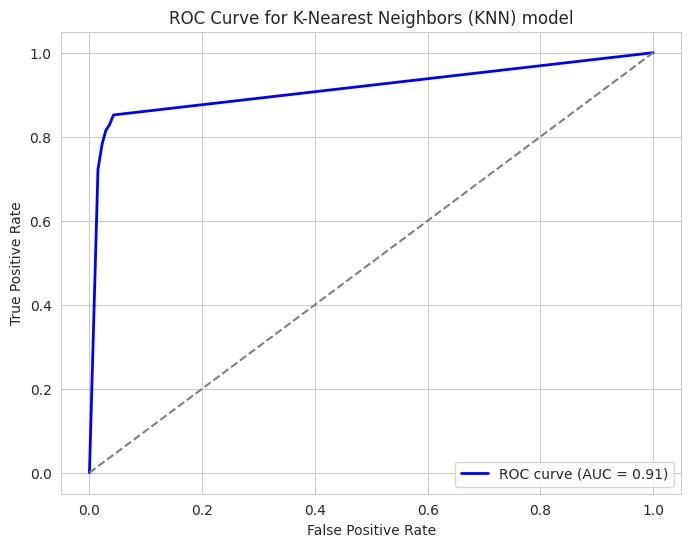

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN) model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

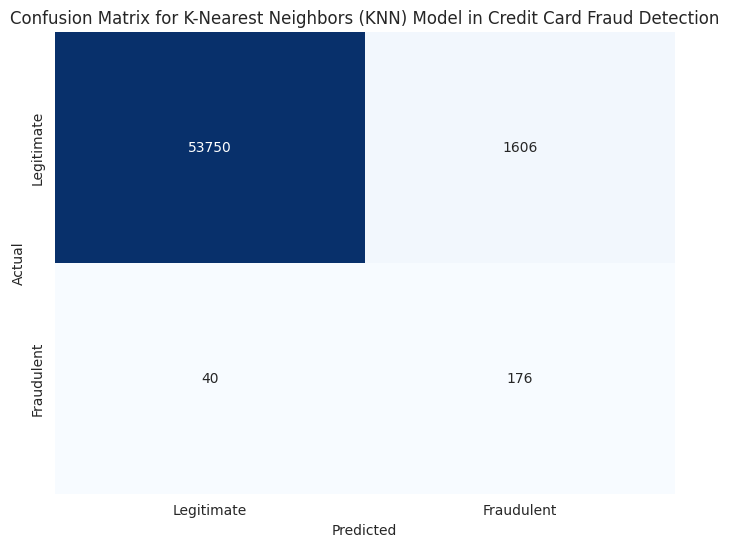

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_KNN, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_KNN]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.098765
1     Recall  0.814815
2   F1-Score  0.176176
3   Accuracy  0.970381
4        AUC  0.913996


In [ ]:
# Define the metrics for each model and sampling technique

# Define the classification report dictionary for logistic regression
classification_report_dict_LR = classification_report(y_test1, predict_LR, output_dict=True)

metrics_logistic_regression = {
    'precision': "{:.2f}".format(classification_report_dict_LR['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_LR['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_LR['1']['f1-score']),
    'accuracy': "{:.2f}".format(LR_accuracy),
    'auc': "{:.2f}".format(auc_LR)
}

# Define the classification report dictionary for decision tree
classification_report_dict_DT = classification_report(y_test1, predict_DT, output_dict=True)

metrics_decision_tree = {
    'precision': "{:.2f}".format(classification_report_dict_DT['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_DT['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_DT['1']['f1-score']),
    'accuracy': "{:.2f}".format(DT_accuracy),
    'auc': "{:.2f}".format(auc_DT)
}

# Define the classification report dictionary for XGB Classifier
classification_report_dict_XGB = classification_report(y_test1, predict_XGB, output_dict=True)

metrics_xgb_classifier = {
    'precision': "{:.2f}".format(classification_report_dict_XGB['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_XGB['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_XGB['1']['f1-score']),
    'accuracy': "{:.2f}".format(XGB_accuracy),
    'auc': "{:.2f}".format(auc_XGB)
}

# Define the classification report dictionary for Random Forest
classification_report_dict_RF = classification_report(y_test1, predict_RF, output_dict=True)

metrics_random_forest = {
    'precision': "{:.2f}".format(classification_report_dict_RF['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_RF['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_RF['1']['f1-score']),
    'accuracy': "{:.2f}".format(RF_accuracy),
    'auc': "{:.2f}".format(auc_RF)
}

# Define the classification report dictionary for KNeighbors Classifier
classification_report_dict_KNN = classification_report(y_test1, predict_KNN, output_dict=True)

metrics_kneighbors = {
    'precision': "{:.2f}".format(classification_report_dict_KNN['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_KNN['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_KNN['1']['f1-score']),
    'accuracy': "{:.2f}".format(KNN_accuracy),
    'auc': "{:.2f}".format(auc_KNN)
}

# Create a DataFrame to store the metrics
metrics_df_smote_oversampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGB Classifier', 'Random Forest', 'KNeighbors Classifier'],
    'Precision': [metrics_logistic_regression['precision'], metrics_decision_tree['precision'], metrics_xgb_classifier['precision'], metrics_random_forest['precision'], metrics_kneighbors['precision']],
    'Recall': [metrics_logistic_regression['recall'], metrics_decision_tree['recall'], metrics_xgb_classifier['recall'], metrics_random_forest['recall'], metrics_kneighbors['recall']],
    'F1-Score': [metrics_logistic_regression['f1-score'], metrics_decision_tree['f1-score'], metrics_xgb_classifier['f1-score'], metrics_random_forest['f1-score'], metrics_kneighbors['f1-score']],
    'Accuracy': [metrics_logistic_regression['accuracy'], metrics_decision_tree['accuracy'], metrics_xgb_classifier['accuracy'], metrics_random_forest['accuracy'], metrics_kneighbors['accuracy']],
    'AUC': [metrics_logistic_regression['auc'], metrics_decision_tree['auc'], metrics_xgb_classifier['auc'], metrics_random_forest['auc'], metrics_kneighbors['auc']]
})

# Print the DataFrame
print("Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 1 with SMOTE Oversampling:")
print(metrics_df_smote_oversampling)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 1 with SMOTE Oversampling:
                   Model Precision Recall F1-Score Accuracy   AUC
0    Logistic Regression      0.04   0.95     0.07     0.91  0.98
1          Decision Tree      0.09   0.78     0.17     0.97  0.88
2         XGB Classifier      0.03   0.99     0.06     0.87  0.99
3          Random Forest      0.10   0.89     0.18     0.97  0.98
4  KNeighbors Classifier      0.10   0.81     0.18     0.97  0.91


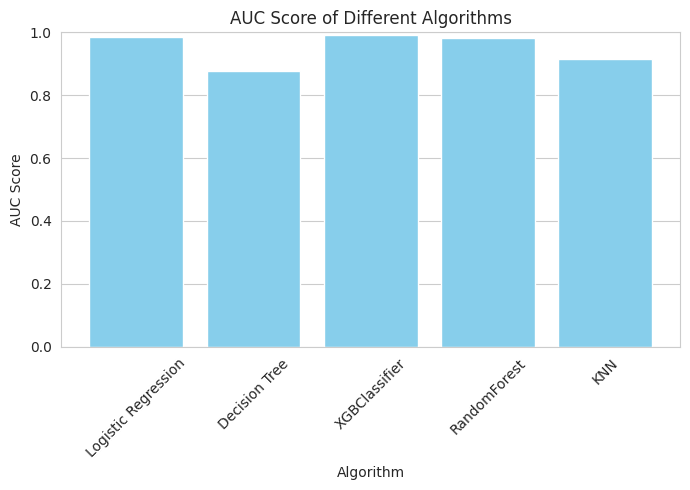

In [ ]:
Algorithms = ['Logistic Regression', 'Decision Tree', 'XGBClassifier', 'RandomForest', 'KNN']
AUC = [auc_LR, auc_DT, auc_XGB, auc_RF, auc_KNN]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC Score':AUC})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC Score'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('AUC Score')
plt.title('AUC Score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (AUC Score ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Case 3: ADASYN Oversampling**

In [ ]:
# Separating thee labels

X_train1_ADASYN = train_df1.drop('is_fraud', axis=1)
y_train1_ADASYN = train_df1['is_fraud']
X_test1 = test_df1.drop('is_fraud', axis=1)
y_test1 = test_df1['is_fraud']

In [ ]:
# Initialize the ADASYN object
adasyn = ADASYN(random_state=42)

# Apply ADASYN to the training data
X_train1_ADASYN, y_train1_ADASYN = adasyn.fit_resample(X_train1_ADASYN, y_train1_ADASYN)

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train1_ADASYN_scaled = scaler.fit_transform(X_train1_ADASYN)
X_test1_scaled = scaler.transform(X_test1)

In [ ]:
# Checking newly created data
print('Current length of the training set: ', len(y_train1_ADASYN))

Current length of the training set:  2577150


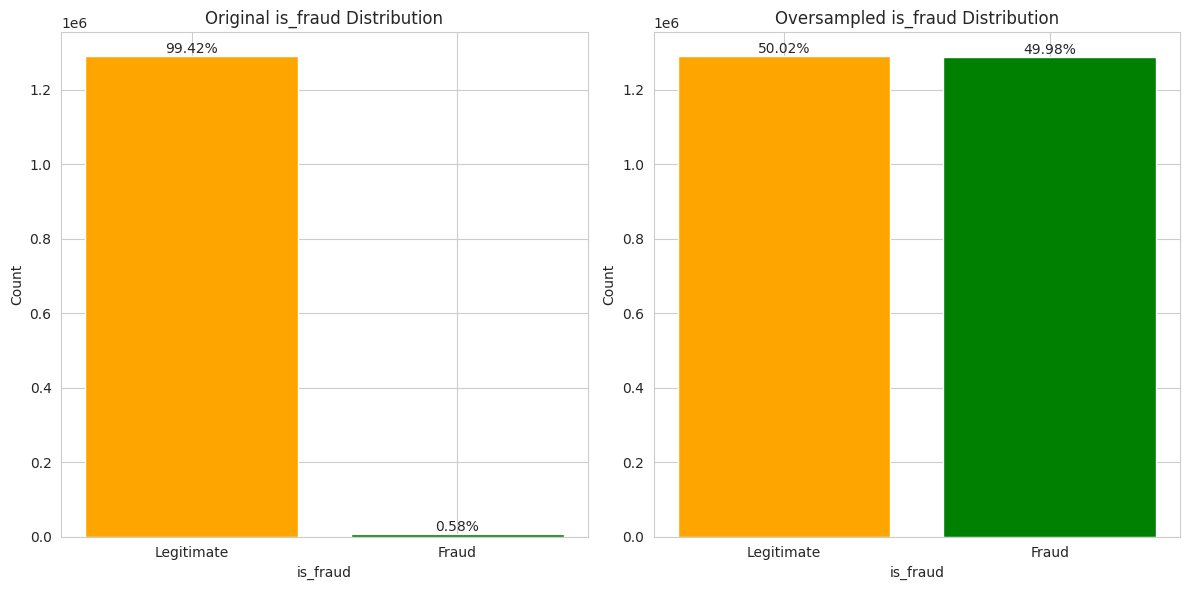

In [ ]:
# Count the occurrences of each class in the original dataset
original_is_fraud_counts = train_df1["is_fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
oversampled_is_fraud_counts = y_train1_ADASYN.value_counts()

# Calculate the percentage of each class
original_percentages = original_is_fraud_counts / len(train_df1) * 100
oversampled_percentages = oversampled_is_fraud_counts / len(y_train1_ADASYN) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original is_fraud distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_is_fraud_counts.index, original_is_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original is_fraud Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(original_is_fraud_counts.index, ['Legitimate', 'Fraud'])

# Bar chart for oversampled is_fraud distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(oversampled_is_fraud_counts.index, oversampled_is_fraud_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, oversampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Oversampled is_fraud Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(oversampled_is_fraud_counts.index, ['Legitimate', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

**MACHINE LEARNING MODEL TRAINING**

[1] Logistic Regression -> LR

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train1_ADASYN_scaled, y_train1_ADASYN)
predict_LR = LR_model.predict(X_test1_scaled)
print(classification_report(y_test1, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test1)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_LR = LR_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test1, y_probs_LR)

print('AUC for Logistic Regression: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     55356
           1       0.03      0.96      0.06       216

    accuracy                           0.88     55572
   macro avg       0.51      0.92      0.50     55572
weighted avg       1.00      0.88      0.93     55572

Logistic Regression accuracy is: 87.58%
AUC for Logistic Regression: 0.98


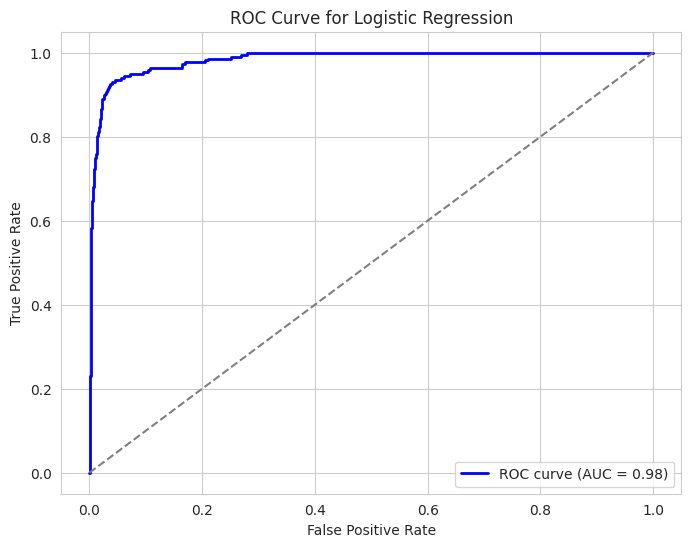

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

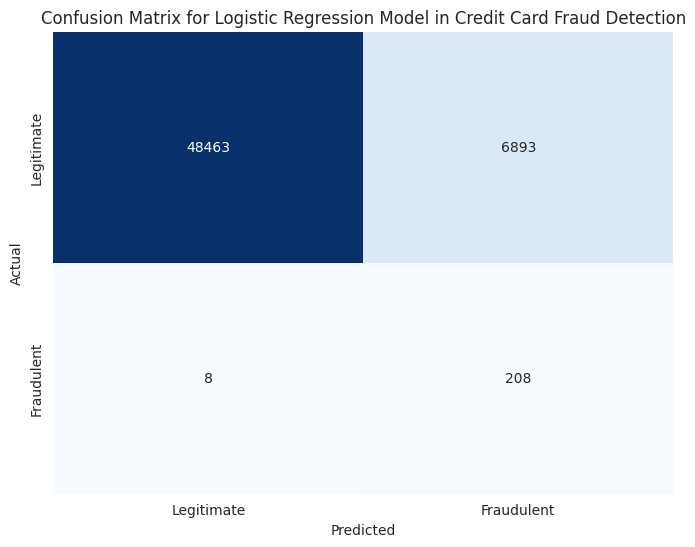

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_LR, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_LR]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.029292
1     Recall  0.962963
2   F1-Score  0.056854
3   Accuracy  0.875819
4        AUC  0.983587


[2] Decision Tree Model (ID3)

In [ ]:
DT_model = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT_model.fit(X_train1_ADASYN_scaled, y_train1_ADASYN)
predict_DT = DT_model.predict(X_test1_scaled)
print(classification_report(y_test1, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test1)
print('Decision Tree model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = DT_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test1, y_probs_DT)

print('AUC for Decision Tree Classifier: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     55356
           1       0.09      0.79      0.16       216

    accuracy                           0.97     55572
   macro avg       0.55      0.88      0.57     55572
weighted avg       1.00      0.97      0.98     55572

Decision Tree model accuracy is: 96.87%
AUC for Decision Tree Classifier: 0.88


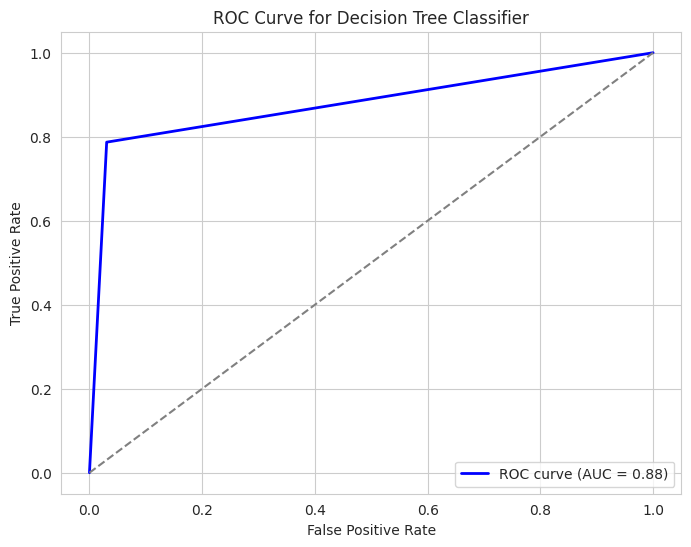

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

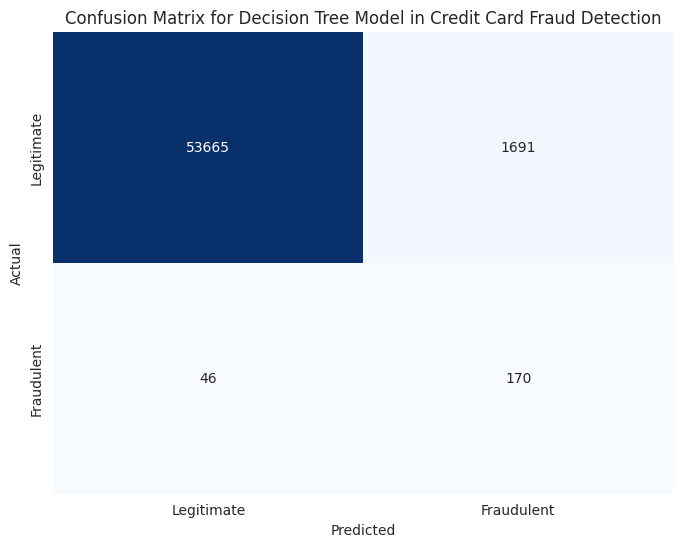

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_DT, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_DT]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.091349
1     Recall  0.787037
2   F1-Score  0.163698
3   Accuracy  0.968743
4        AUC  0.878245


[3] XGB Classifier

In [ ]:
# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train1_ADASYN_scaled, y_train1_ADASYN)

# Make predictions on the test set
predict_XGB = XGB_model.predict(X_test1_scaled)

# Evaluate the model
print(classification_report(y_test1, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test1)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_XGB = XGB_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_XGB)

# Calculate AUC
auc_XGB = roc_auc_score(y_test1, y_probs_XGB)

print('AUC for XGBoost classifier: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     55356
           1       0.02      0.99      0.05       216

    accuracy                           0.84     55572
   macro avg       0.51      0.91      0.48     55572
weighted avg       1.00      0.84      0.91     55572

XGBoost model accuracy is: 84.38%
AUC for XGBoost classifier: 0.99


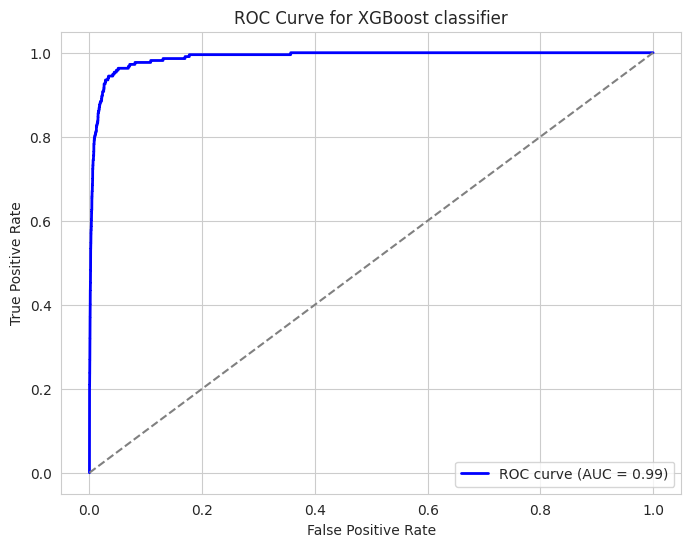

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

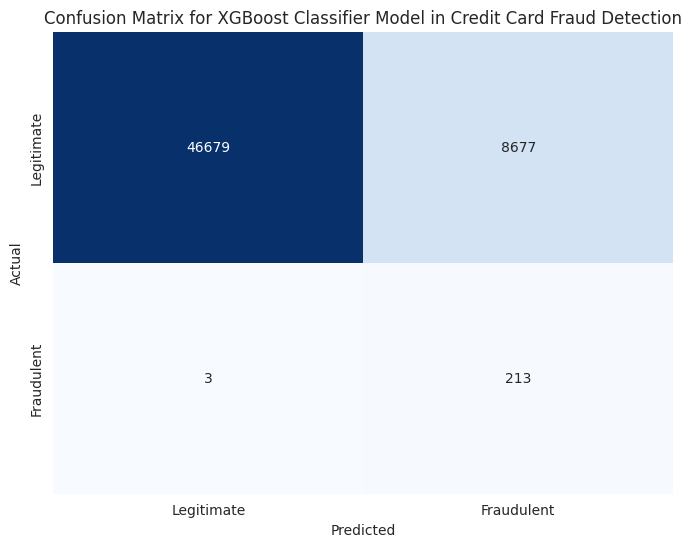

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_XGB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_XGB, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_XGB]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.023960
1     Recall  0.986111
2   F1-Score  0.046782
3   Accuracy  0.843806
4        AUC  0.989226


[4] Random Forest Classifier

In [ ]:
# Initialize and train the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train1_ADASYN_scaled, y_train1_ADASYN)

predict_RF = RF_model.predict(X_test1_scaled)

# Evaluate the model
print(classification_report(y_test1, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test1)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = RF_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test1, y_probs_RF)

print('AUC for Random Forest classifier: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     55356
           1       0.08      0.89      0.14       216

    accuracy                           0.96     55572
   macro avg       0.54      0.92      0.56     55572
weighted avg       1.00      0.96      0.98     55572

Random Forest model accuracy is: 95.86%
AUC for Random Forest classifier: 0.98


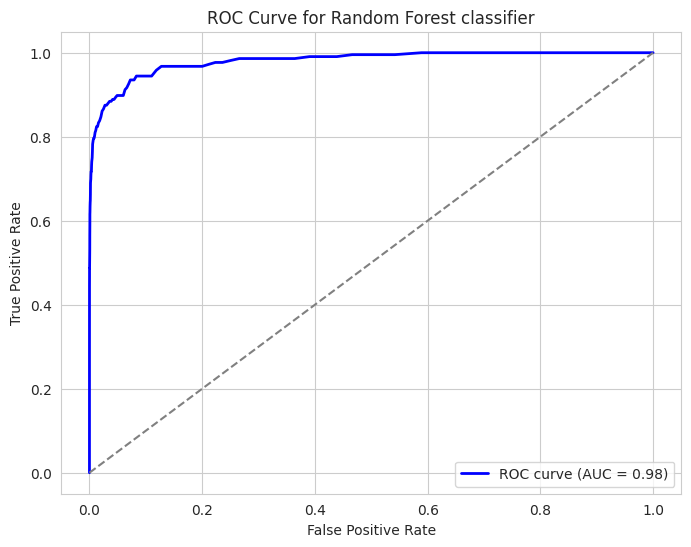

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

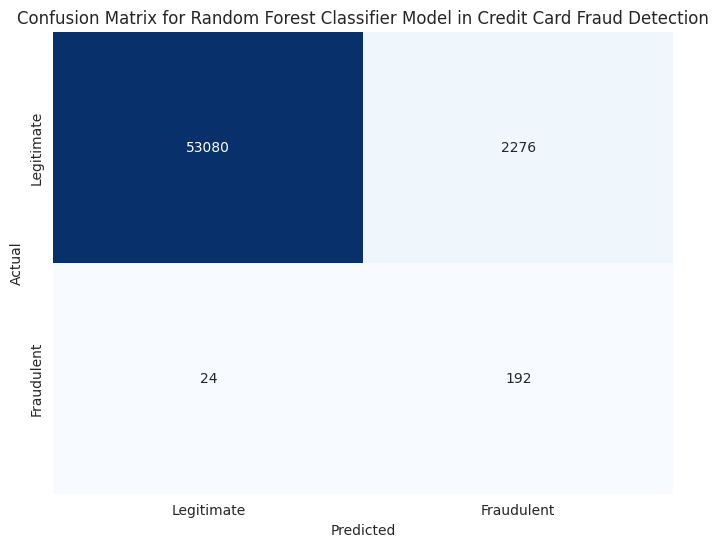

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_RF, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_RF]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.077796
1     Recall  0.888889
2   F1-Score  0.143070
3   Accuracy  0.958612
4        AUC  0.980444


[5] K-Nearest Neighbors (KNN) Model

In [ ]:
# Instantiate KNN model
KNN_model = KNeighborsClassifier()

# Train the KNN model
KNN_model.fit(X_train1_ADASYN_scaled, y_train1_ADASYN)

# Make predictions on the test set
predict_KNN = KNN_model.predict(X_test1_scaled)

# Evaluate the performance of KNN model
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(classification_report(y_test1, predict_KNN))

# Calculate accuracy
KNN_accuracy = accuracy_score(predict_KNN, y_test1)
print('K-Nearest Neighbors (KNN) accuracy is: {:.2f}%'.format(KNN_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = KNN_model.predict_proba(X_test1_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test1, y_probs_KNN)

print('AUC for K-Nearest Neighbors (KNN): {:.2f}'.format(auc_KNN))

Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     55356
           1       0.10      0.82      0.18       216

    accuracy                           0.97     55572
   macro avg       0.55      0.90      0.58     55572
weighted avg       1.00      0.97      0.98     55572

K-Nearest Neighbors (KNN) accuracy is: 96.99%
AUC for K-Nearest Neighbors (KNN): 0.92


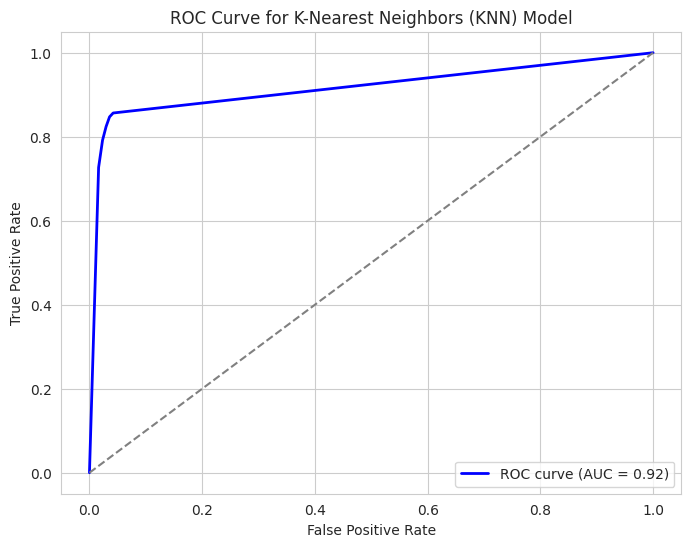

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN) Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

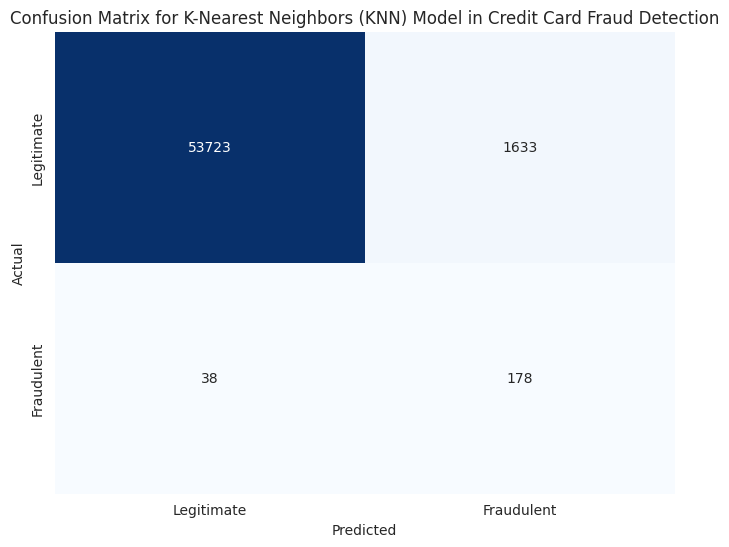

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test1, predict_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test1, predict_KNN, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_KNN]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.098288
1     Recall  0.824074
2   F1-Score  0.175629
3   Accuracy  0.969931
4        AUC  0.916080


In [ ]:
# Define the metrics for each model and sampling technique

# Define the classification report dictionary for logistic regression
classification_report_dict_LR = classification_report(y_test1, predict_LR, output_dict=True)

metrics_logistic_regression = {
    'precision': "{:.2f}".format(classification_report_dict_LR['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_LR['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_LR['1']['f1-score']),
    'accuracy': "{:.2f}".format(LR_accuracy),
    'auc': "{:.2f}".format(auc_LR)
}

# Define the classification report dictionary for decision tree
classification_report_dict_DT = classification_report(y_test1, predict_DT, output_dict=True)

metrics_decision_tree = {
    'precision': "{:.2f}".format(classification_report_dict_DT['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_DT['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_DT['1']['f1-score']),
    'accuracy': "{:.2f}".format(DT_accuracy),
    'auc': "{:.2f}".format(auc_DT)
}

# Define the classification report dictionary for XGB Classifier
classification_report_dict_XGB = classification_report(y_test1, predict_XGB, output_dict=True)

metrics_xgb_classifier = {
    'precision': "{:.2f}".format(classification_report_dict_XGB['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_XGB['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_XGB['1']['f1-score']),
    'accuracy': "{:.2f}".format(XGB_accuracy),
    'auc': "{:.2f}".format(auc_XGB)
}

# Define the classification report dictionary for Random Forest
classification_report_dict_RF = classification_report(y_test1, predict_RF, output_dict=True)

metrics_random_forest = {
    'precision': "{:.2f}".format(classification_report_dict_RF['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_RF['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_RF['1']['f1-score']),
    'accuracy': "{:.2f}".format(RF_accuracy),
    'auc': "{:.2f}".format(auc_RF)
}

# Define the classification report dictionary for KNeighbors Classifier
classification_report_dict_KNN = classification_report(y_test1, predict_KNN, output_dict=True)

metrics_kneighbors = {
    'precision': "{:.2f}".format(classification_report_dict_KNN['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_KNN['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_KNN['1']['f1-score']),
    'accuracy': "{:.2f}".format(KNN_accuracy),
    'auc': "{:.2f}".format(auc_KNN)
}

# Create a DataFrame to store the metrics
metrics_df_adasyn_oversampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGB Classifier', 'Random Forest', 'KNeighbors Classifier'],
    'Precision': [metrics_logistic_regression['precision'], metrics_decision_tree['precision'], metrics_xgb_classifier['precision'], metrics_random_forest['precision'], metrics_kneighbors['precision']],
    'Recall': [metrics_logistic_regression['recall'], metrics_decision_tree['recall'], metrics_xgb_classifier['recall'], metrics_random_forest['recall'], metrics_kneighbors['recall']],
    'F1-Score': [metrics_logistic_regression['f1-score'], metrics_decision_tree['f1-score'], metrics_xgb_classifier['f1-score'], metrics_random_forest['f1-score'], metrics_kneighbors['f1-score']],
    'Accuracy': [metrics_logistic_regression['accuracy'], metrics_decision_tree['accuracy'], metrics_xgb_classifier['accuracy'], metrics_random_forest['accuracy'], metrics_kneighbors['accuracy']],
    'AUC': [metrics_logistic_regression['auc'], metrics_decision_tree['auc'], metrics_xgb_classifier['auc'], metrics_random_forest['auc'], metrics_kneighbors['auc']]
})

# Print the DataFrame
print("Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 1 with ADASYN:")
print(metrics_df_adasyn_oversampling)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 1 with ADASYN:
                   Model Precision Recall F1-Score Accuracy   AUC
0    Logistic Regression      0.03   0.96     0.06     0.88  0.98
1          Decision Tree      0.09   0.79     0.16     0.97  0.88
2         XGB Classifier      0.02   0.99     0.05     0.84  0.99
3          Random Forest      0.08   0.89     0.14     0.96  0.98
4  KNeighbors Classifier      0.10   0.82     0.18     0.97  0.92


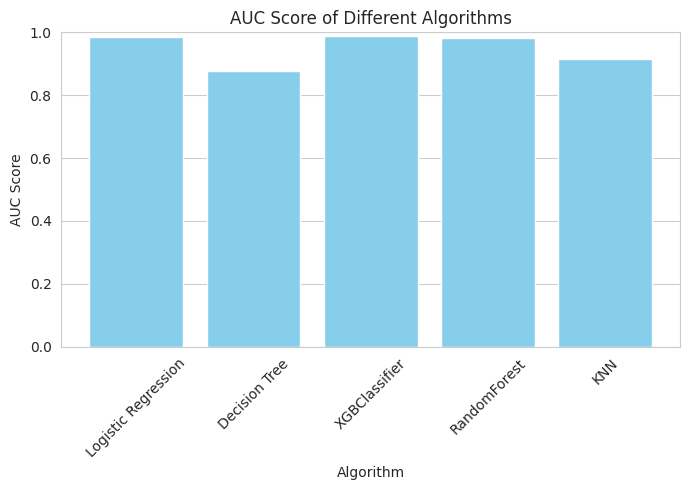

In [ ]:
Algorithms = ['Logistic Regression', 'Decision Tree', 'XGBClassifier', 'RandomForest', 'KNN']
AUC = [auc_LR, auc_DT, auc_XGB, auc_RF, auc_KNN]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC Score':AUC})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC Score'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('AUC Score')
plt.title('AUC Score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (AUC Score ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()